# Исследование игр
Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Нам необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Необходимо отработать принцип работы с ними. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). 
Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**План работы**

Шаг 1. Проведем обзор данных 

Шаг 2. Подготовим данные к анализу

- заменим названия столбцов (приведем к нижнему регистру);
- преобразуем данные в нужные типы;
- обработаем пропуски при необходимости;
- посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

Шаг 3. Проведем исследовательский анализ данных

- посмотрим, сколько игр выпускалось в разные годы, как менялись продажи по платформам; 
- выберем платформы с наибольшими суммарными продажами и построим распределение по годам; 
- определим за какой характерный срок появляются новые и исчезают старые платформы.

Возьмем данные за соответствующий актуальный период, которые помогут построить прогноз на 2017 год.

- выявим какие платформы лидируют по продажам, растут и падают;
- выберем несколько потенциально прибыльных платформ.

Определим, как влияют на продажи отзывы пользователей и критиков. 

Посмотрим на общее распределение игр по жанрам. Выделим жанры с высокими и низкими продажами.

Шаг 4. Составим портрет пользователя каждого региона

- определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). 
Самые популярные жанры (топ-5). 

- изучим влияние рейтинга ESRB на продажи в отдельном регионе.

Шаг 5. Проверим гипотезы

- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports разные.

Шаг 6. Напишем общий вывод

## Общая информация

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%config InlineBackend.figure_format = 'retina'

import matplotlib
matplotlib.style.use('seaborn-pastel')

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
#проверим на дубликаты

data.duplicated().sum()

0

Ознакомившись с файлом, на первый взгляд можно сказать, что у нас в распоряжении данные о 16 715 играх.

Есть пропуски в столбцах:

- наименование;
- жанр;
- год выпуска;
- оценка пользователей и критиков;
- рейтинг.

Необходимо изменить формат столбца с годом выпуска на целочисленный для удобства и формат стобца с оценкой пользователей должен быть float64, исходя из заполненных строк, оценка пользователей осуществляется по 10-бальной шкале с точностью до десятых после запятой. 

Выполним необходимые изменения для проведения анализа.

## Подготовка данных

In [6]:
#приведем названия столбцов к нижнему регистру

data.columns = data.columns.str.lower()
data.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [7]:
#посмотрим количество пропусков 

data.isna().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Количество строк с пропущенным названием игры, годом выпуска и жанром не так много, если мы их отбросим это не повлияет на дальнейший анализ данных.

In [8]:
data = data.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

In [9]:
#изменим тип данных столбца с годом выпуска на целочисленный

data['year_of_release'] = data['year_of_release'].astype('int')

In [10]:
#посмотрим уникальные значения в столбце с оценками пользователей

print(data['user_score'].unique())

#посмотрим количество строк со значением tbd (to be determined) - подлежит уточнению, в столбце с оценками пользователей

data.loc[data['user_score'] == 'tbd']

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16424,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16426,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16427,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16433,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Фактически строки со значением tbd не известны, заменим их на Nan

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = 'Nan'

In [12]:
#изменим тип данных столбца с оценкой пользователей на число с плавающей точкой

data['user_score'] = data['user_score'].astype(float)

In [13]:
#заполним пропуски в столбце с рейтингом на значение "без рейтинга"

data['rating'] = data['rating'].fillna('no_rating')

In [14]:
#добавим новый столбец с данными по суммарным продажам во всех регионах 

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Количество пропусков в столбцах с оценкой критиков, пользователей и рейтинга значительное количество, поэтому удалять их или заполнять какими либо значениями не будем, потому как это приведет к искажению данных.

Пропуски могли возникнуть по причине технической ошибки или данные просто не были указаны пользователем. 

Оценки и рейтинг также могут быть не известны по причине того что игра новая и данные еще не собраны или же наоборот игра старая и на тот момент еще не существовало системы оценки и присвоения рейтинга или еще один вариант - игра не получила широкого распространения, таким образом сбор оценок и присвоение рейтинга не имело смысла.

## Исследовательский анализ

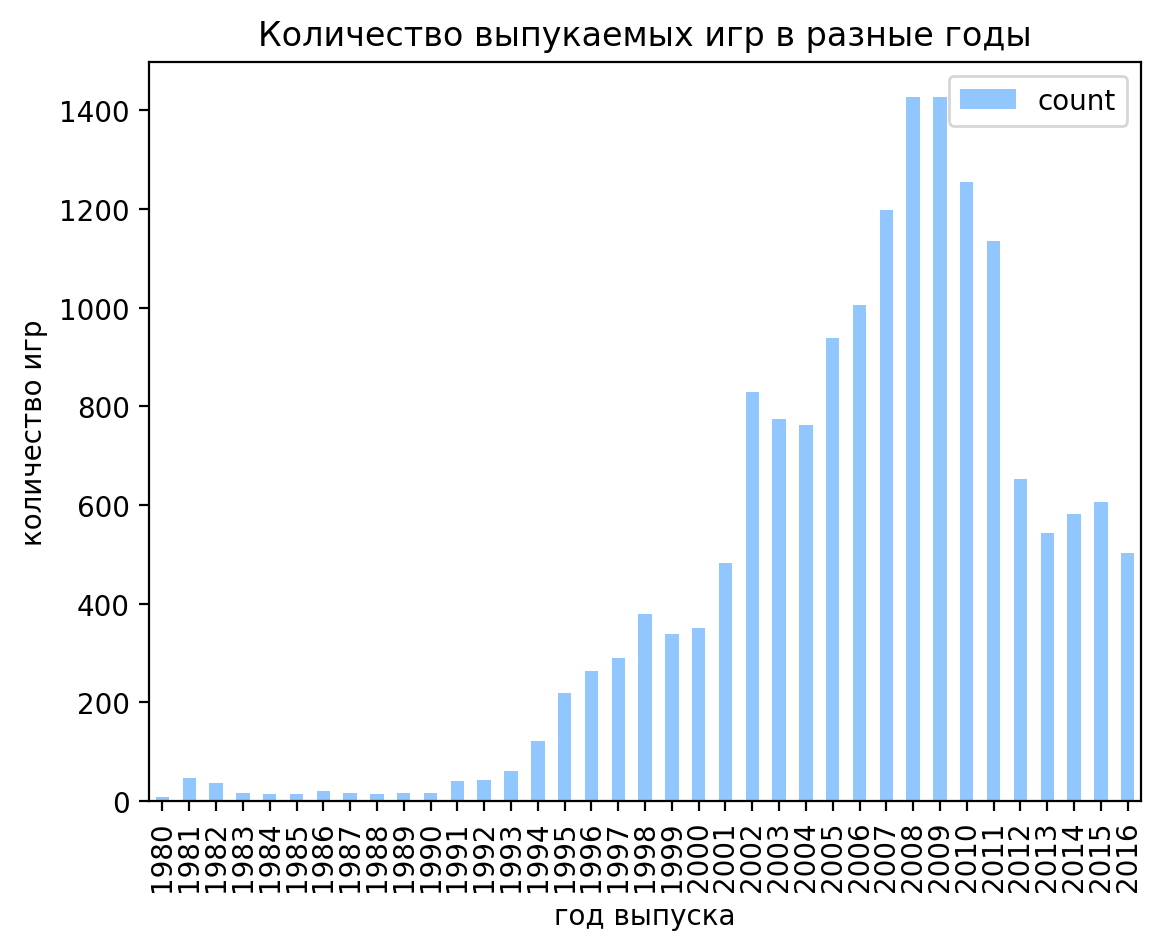

In [15]:
#посмотрим сколько игр выпускалось в разные годы

data_pivot_year = data.pivot_table(index='year_of_release', values='name', aggfunc=['count'])
data_pivot_year.columns = ['count']
data_pivot_year.plot(kind='bar')
plt.title("Количество выпукаемых игр в разные годы")
plt.xlabel("год выпуска")
plt.ylabel("количество игр")
plt.show()

Активный рост числа игр начинается с 1994 года, далее пики приходятся на 2002 год (увеличение приблизительно в 1,5 раза по сравнению с предыдущим годом) и 2008 год (увеличение приблизительно в 2 раза по сравнению с 2002 годом). 

После 2009 года начинается спад, в 2012 году резкое сокращение количества выпукаемых игр (почти в 2 раза по сравнению в предыдущим годом).

В 2013 году незначительный спад продолжился, а далее начался рост. Данные за 2016 год могут быть не полными, поэтому сделать однозначный вывод что в 2016 году вновь было сокращение количества выпускаемых игр мы не можем.

Данных до 1994 года не так много, можем предположить что они не так важны для исследования.

                   sum                                                         \
platform          2600   3DO    3DS    DC      DS     GB    GBA     GC    GEN   
year_of_release                                                                 
1980             11.38   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1981             35.68   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1982             28.88   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1983              5.84   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1984              0.27   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1985              0.45   NaN    NaN   NaN    0.02    NaN    NaN    NaN    NaN   
1986              0.67   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1987              1.94   NaN    NaN   NaN     NaN    NaN    NaN    NaN    NaN   
1988              0.74   NaN    NaN   NaN     NaN   1.43    NaN    NaN    NaN   
1989              0.63   NaN

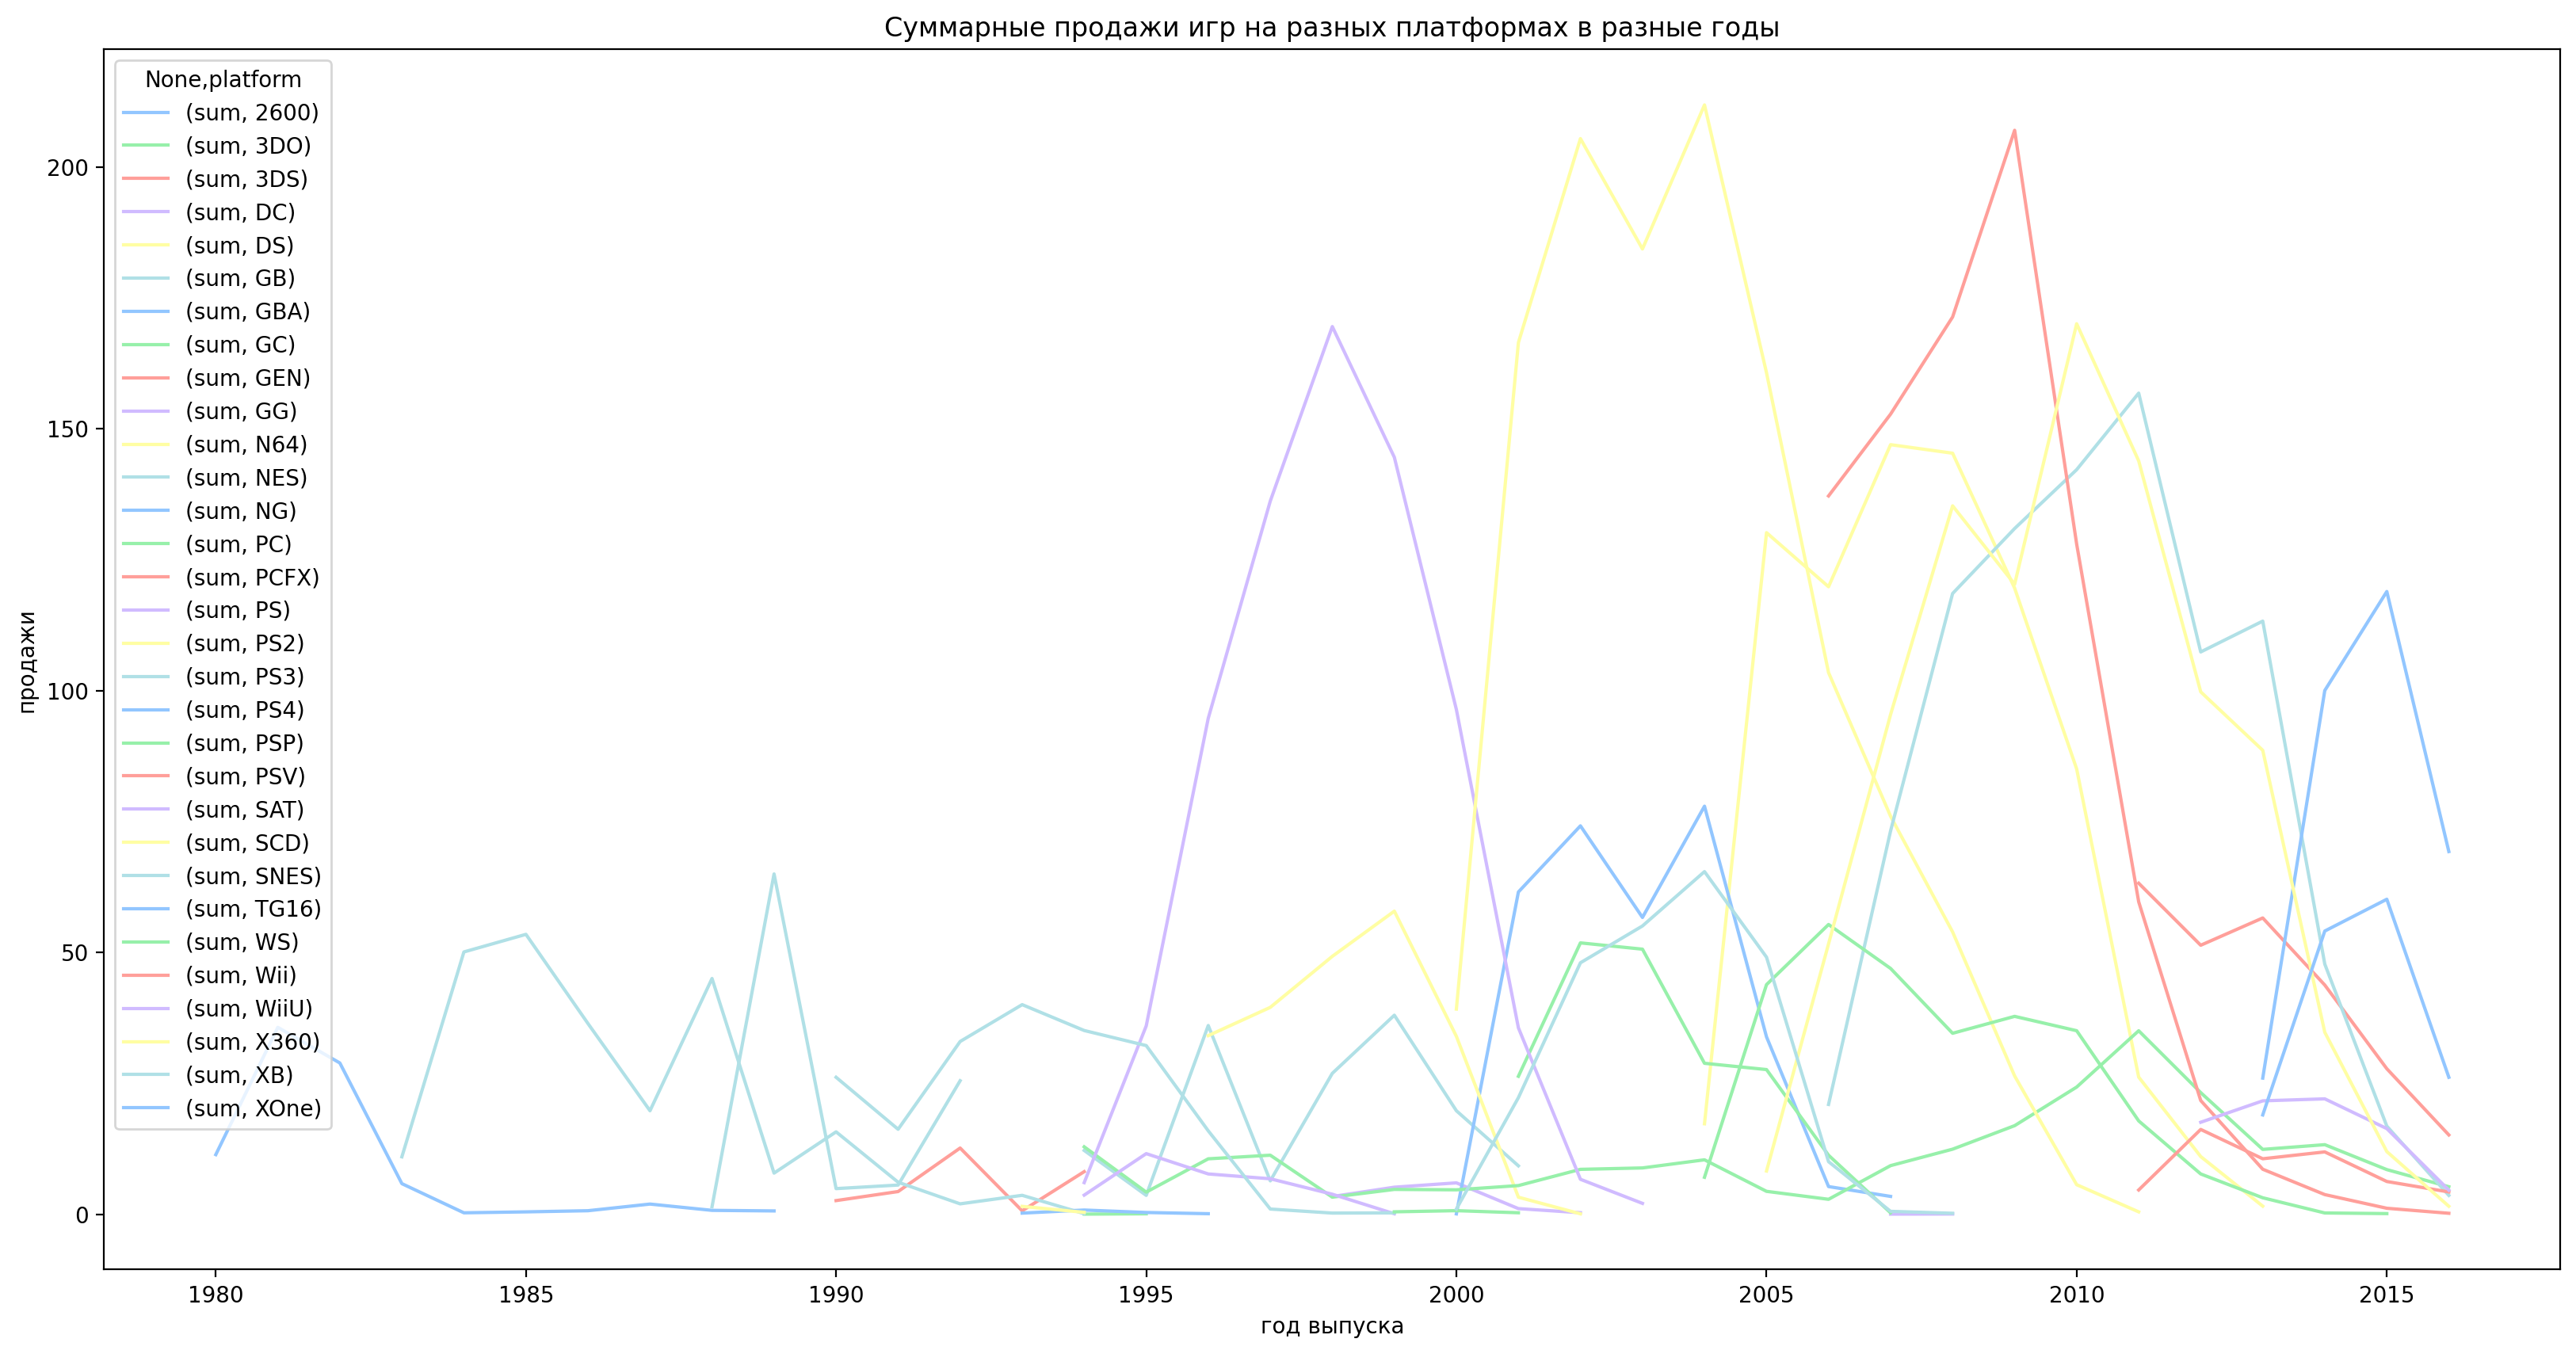

In [16]:
#посмотрим, как менялись продажи по платформам 
#определим за какой характерный срок появляются новые и исчезают старые платформы

#посмотрим на все столбцы

pd.set_option('display.max_columns', None)

#сформируем сводную таблицу и посчитаем сумму общих продаж каждой платформы за каждый год  

data_pivot_platform_sales = data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc=['sum'])
print(data_pivot_platform_sales)

#построим график

data_pivot_platform_sales.plot(figsize=(20,10))
plt.title("Суммарные продажи игр на разных платформах в разные годы")
plt.xlabel("год выпуска")
plt.ylabel("продажи")
plt.show()

В целом можно сказать что продажи на каждой платформе проходят жизненный цикл до 10 лет в среднем, с момента выпуска игры - рост, далее пик продаж и спад. 

Есть и исключения - PC (персональный компьютер), продажи на протяжении более чем 22 лет, характеризующиеся сменами роста и спада.

Характерным сроком за который появляются новые и исчезают старые платформы является период в 6-7 лет.

In [17]:
#выберем 10 платформ с наибольшими суммарными продажами

data_pivot_ten_platform = data.pivot_table(index='platform', values='total_sales', aggfunc=['sum'])
data_pivot_ten_platform.columns = ['sum']
data_pivot_ten_platform.sort_values(by='sum', ascending=False).head(10)

,sum
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [18]:
#создадим список с топ-10 пллатформ с наибольшими суммарными продажами

data_pivot_ten_platform = data_pivot_ten_platform.sort_values(by='sum', ascending=False).head(10).index
print(data_pivot_ten_platform)

#сделаем срез данных по том-10 платформам

data_ten_platform = data.query('platform in @data_pivot_ten_platform')
data_ten_platform

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16437,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating,0.01
16438,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,no_rating,0.00
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01


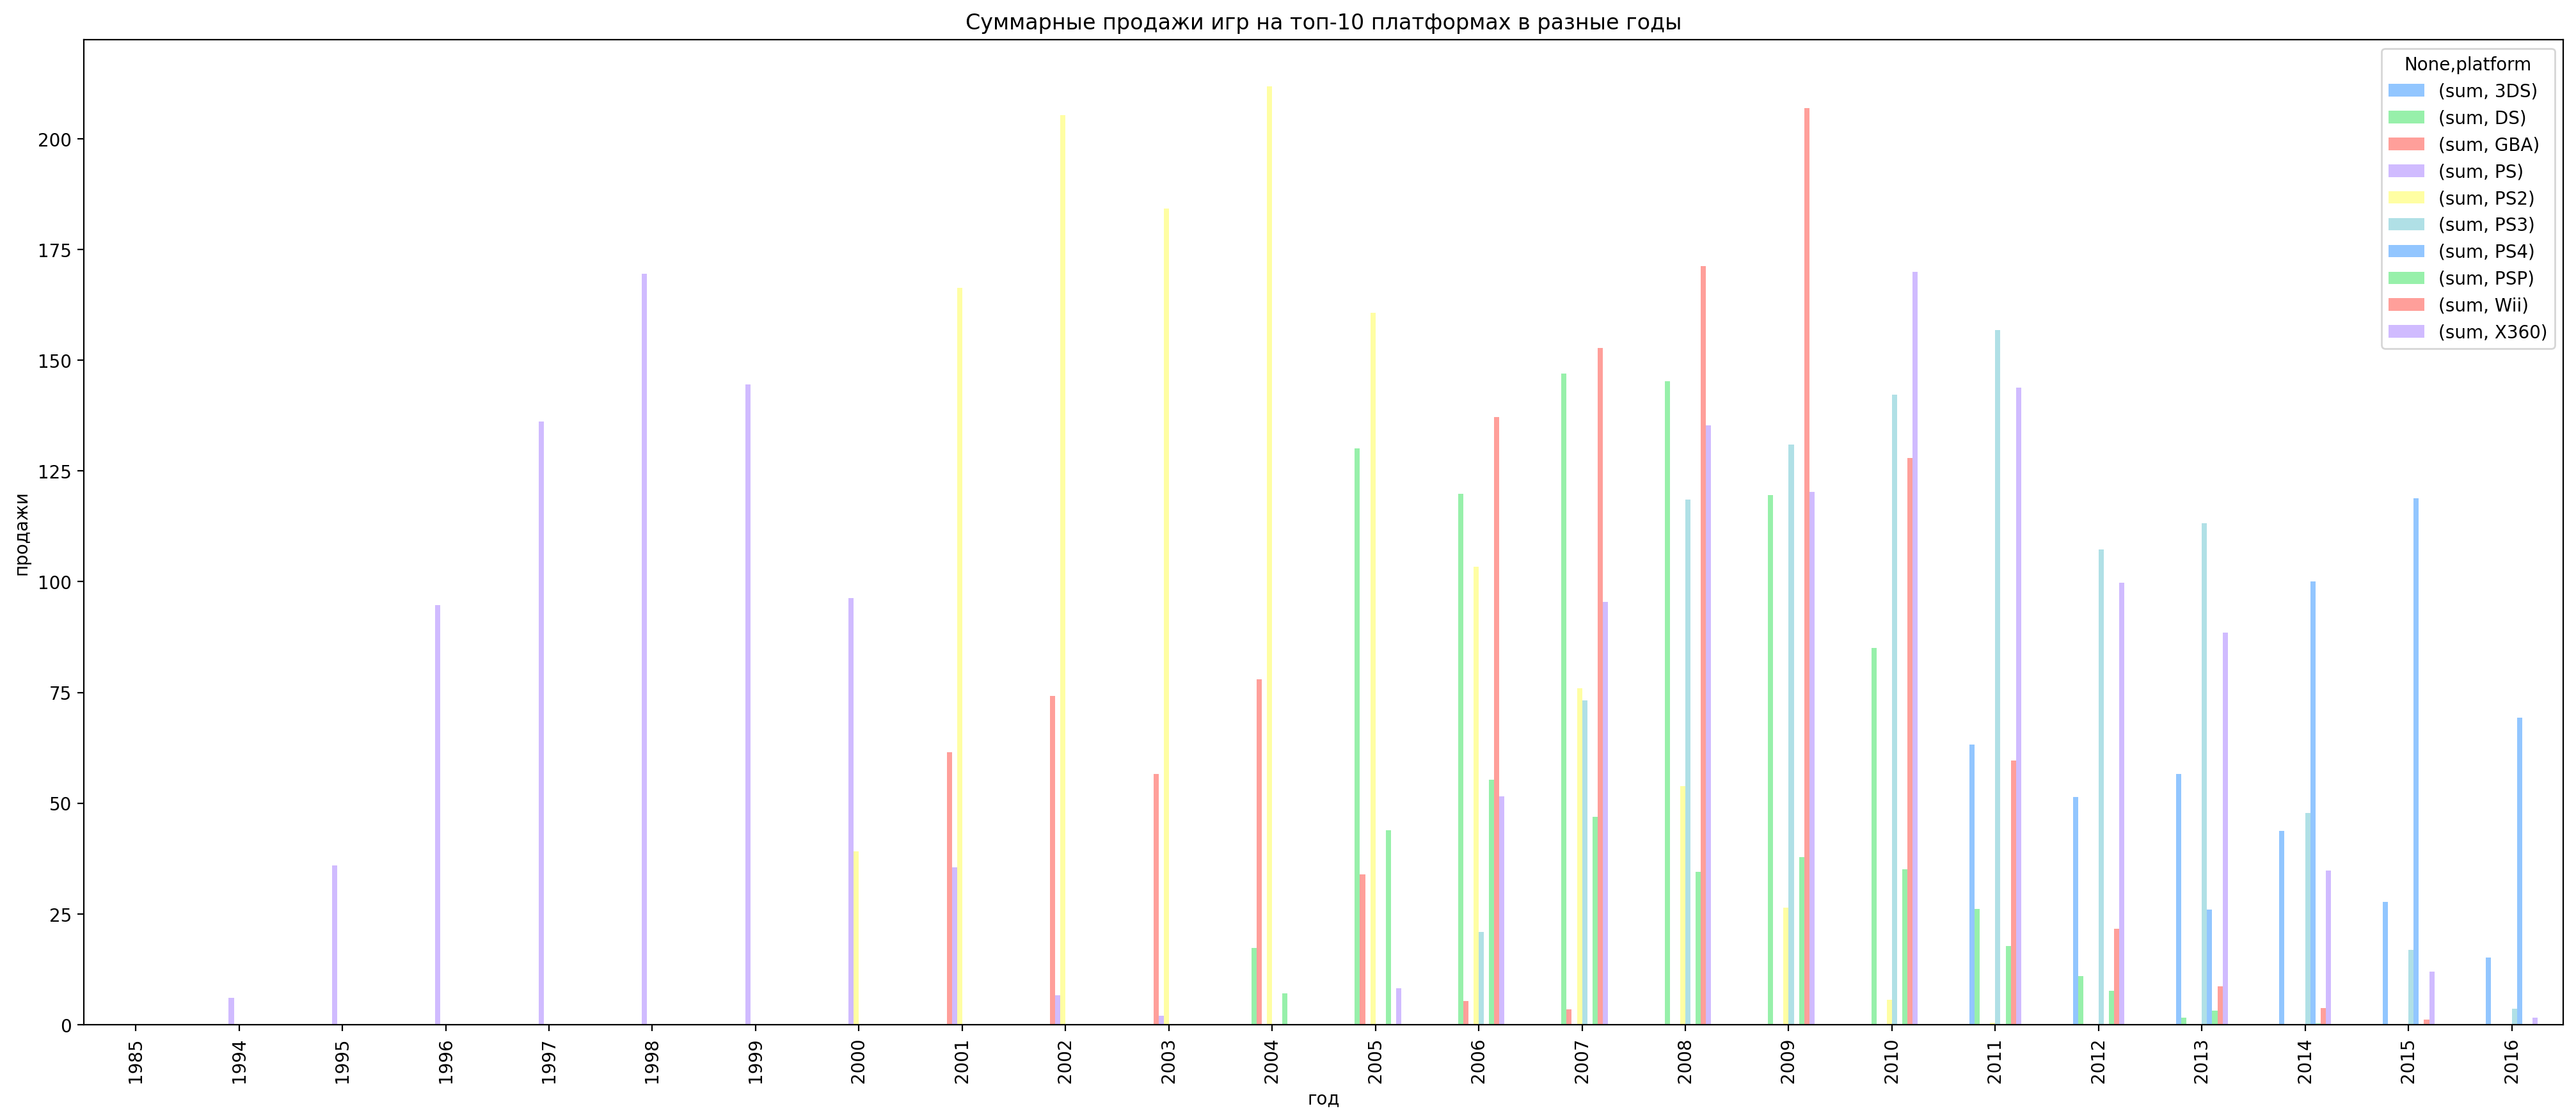

In [19]:
#и построим распределение продаж в разные годы по топ-10 платформам

data_pivot_ten_platform = data_ten_platform.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=['sum'])

data_pivot_ten_platform.plot(kind='bar', figsize=(25,10))
plt.title("Суммарные продажи игр на топ-10 платформах в разные годы")
plt.xlabel("год")
plt.ylabel("продажи")
plt.show()


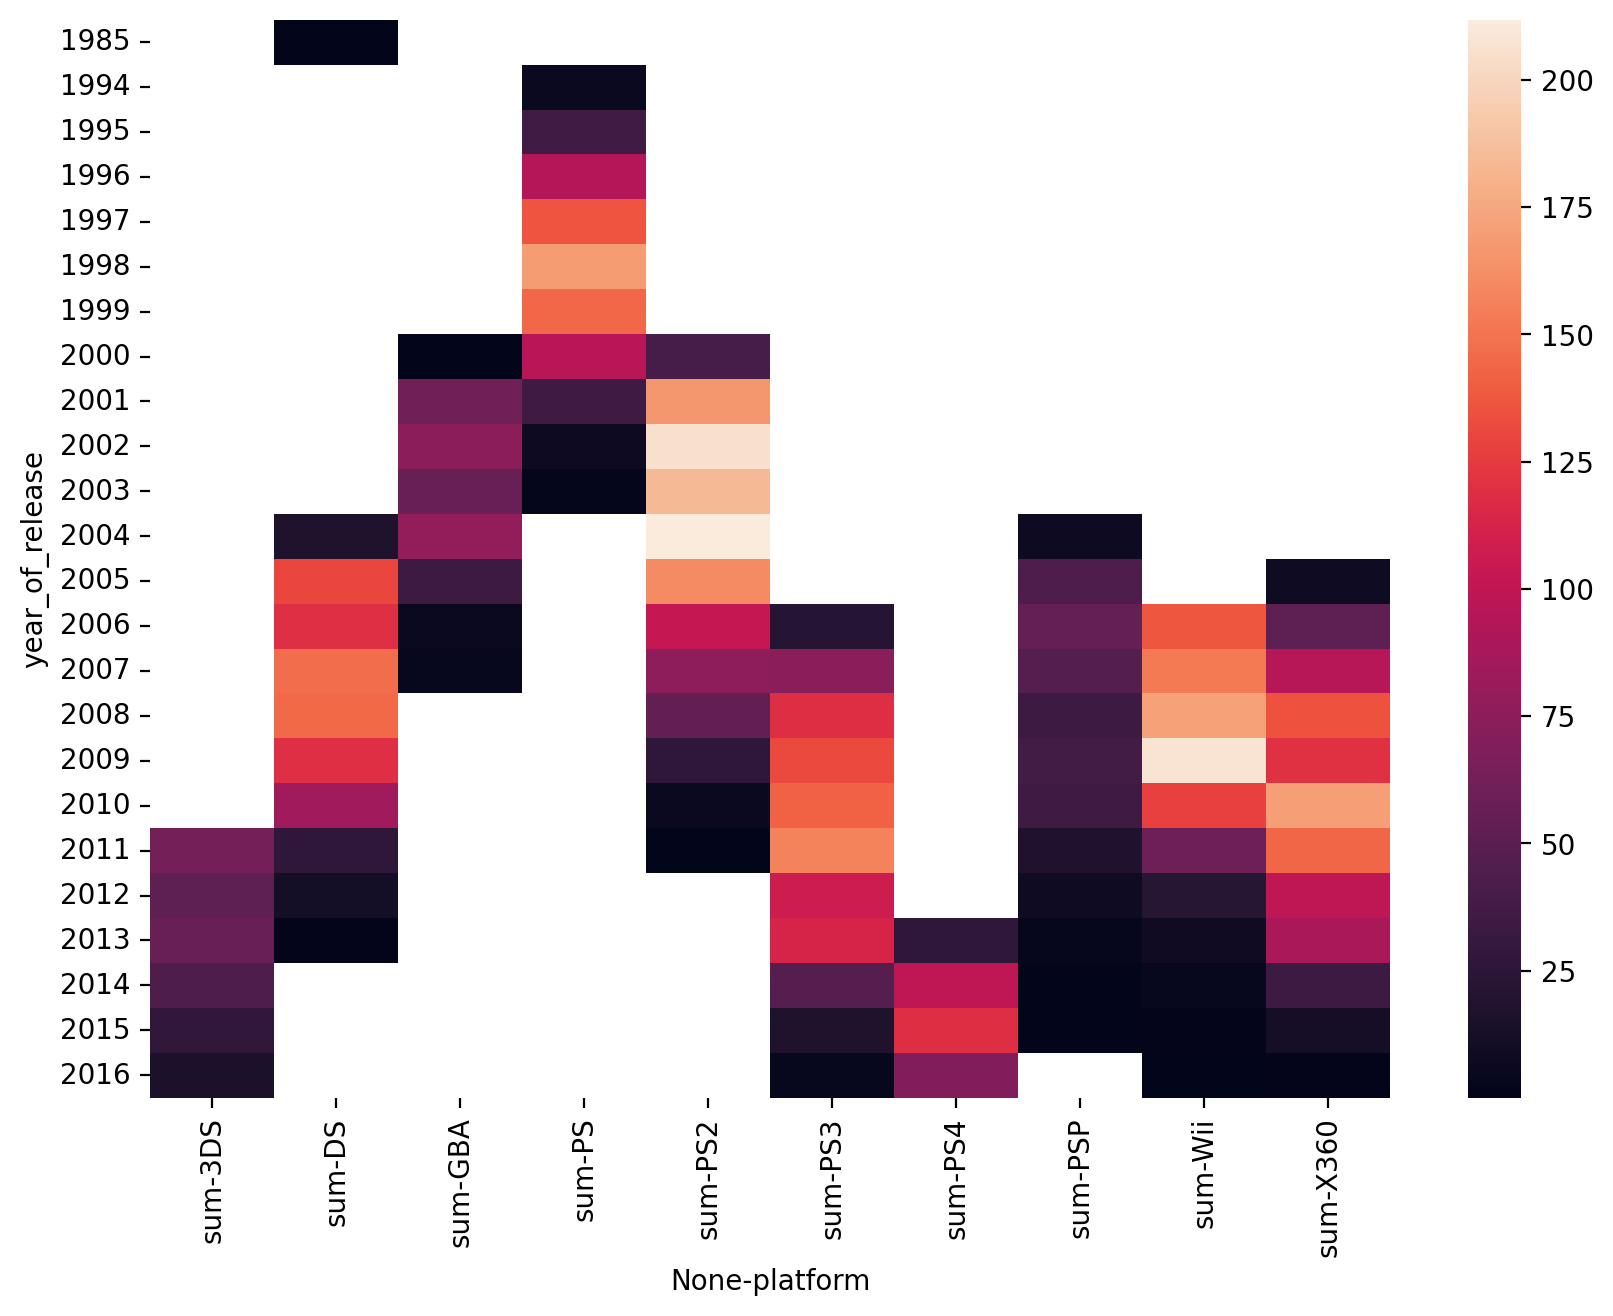

In [20]:
#посмотрим на тепловой карте срок жизни по топ-10 платформам

plt.figure(figsize=(10,7))
sns.heatmap(data_pivot_ten_platform)
plt.show()

In [21]:
mean_life_circle = data_pivot_ten_platform['sum'].count().mean()
print('Средний срок жизни платформы составляет:', mean_life_circle, 'лет')

Средний срок жизни платформы составляет: 9.7 лет


В результате исследования предыдущих вопросов, за актуальный период возьмем данные с 2014 года. 

In [22]:
data_actual_period = data.query('year_of_release > 2013')

#посмотрим платфоры лидирующие по продажам за актуальный период

data_sales_leaders = data_actual_period.pivot_table(index='platform', values='total_sales', aggfunc=['sum'])
data_sales_leaders.columns = ['sum']
data_sales_leaders.sort_values(by='sum', ascending=False)

,sum
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Топ-5 платформ лидеров по продажам это: PS4, XOne, 3DS, PS3, X360

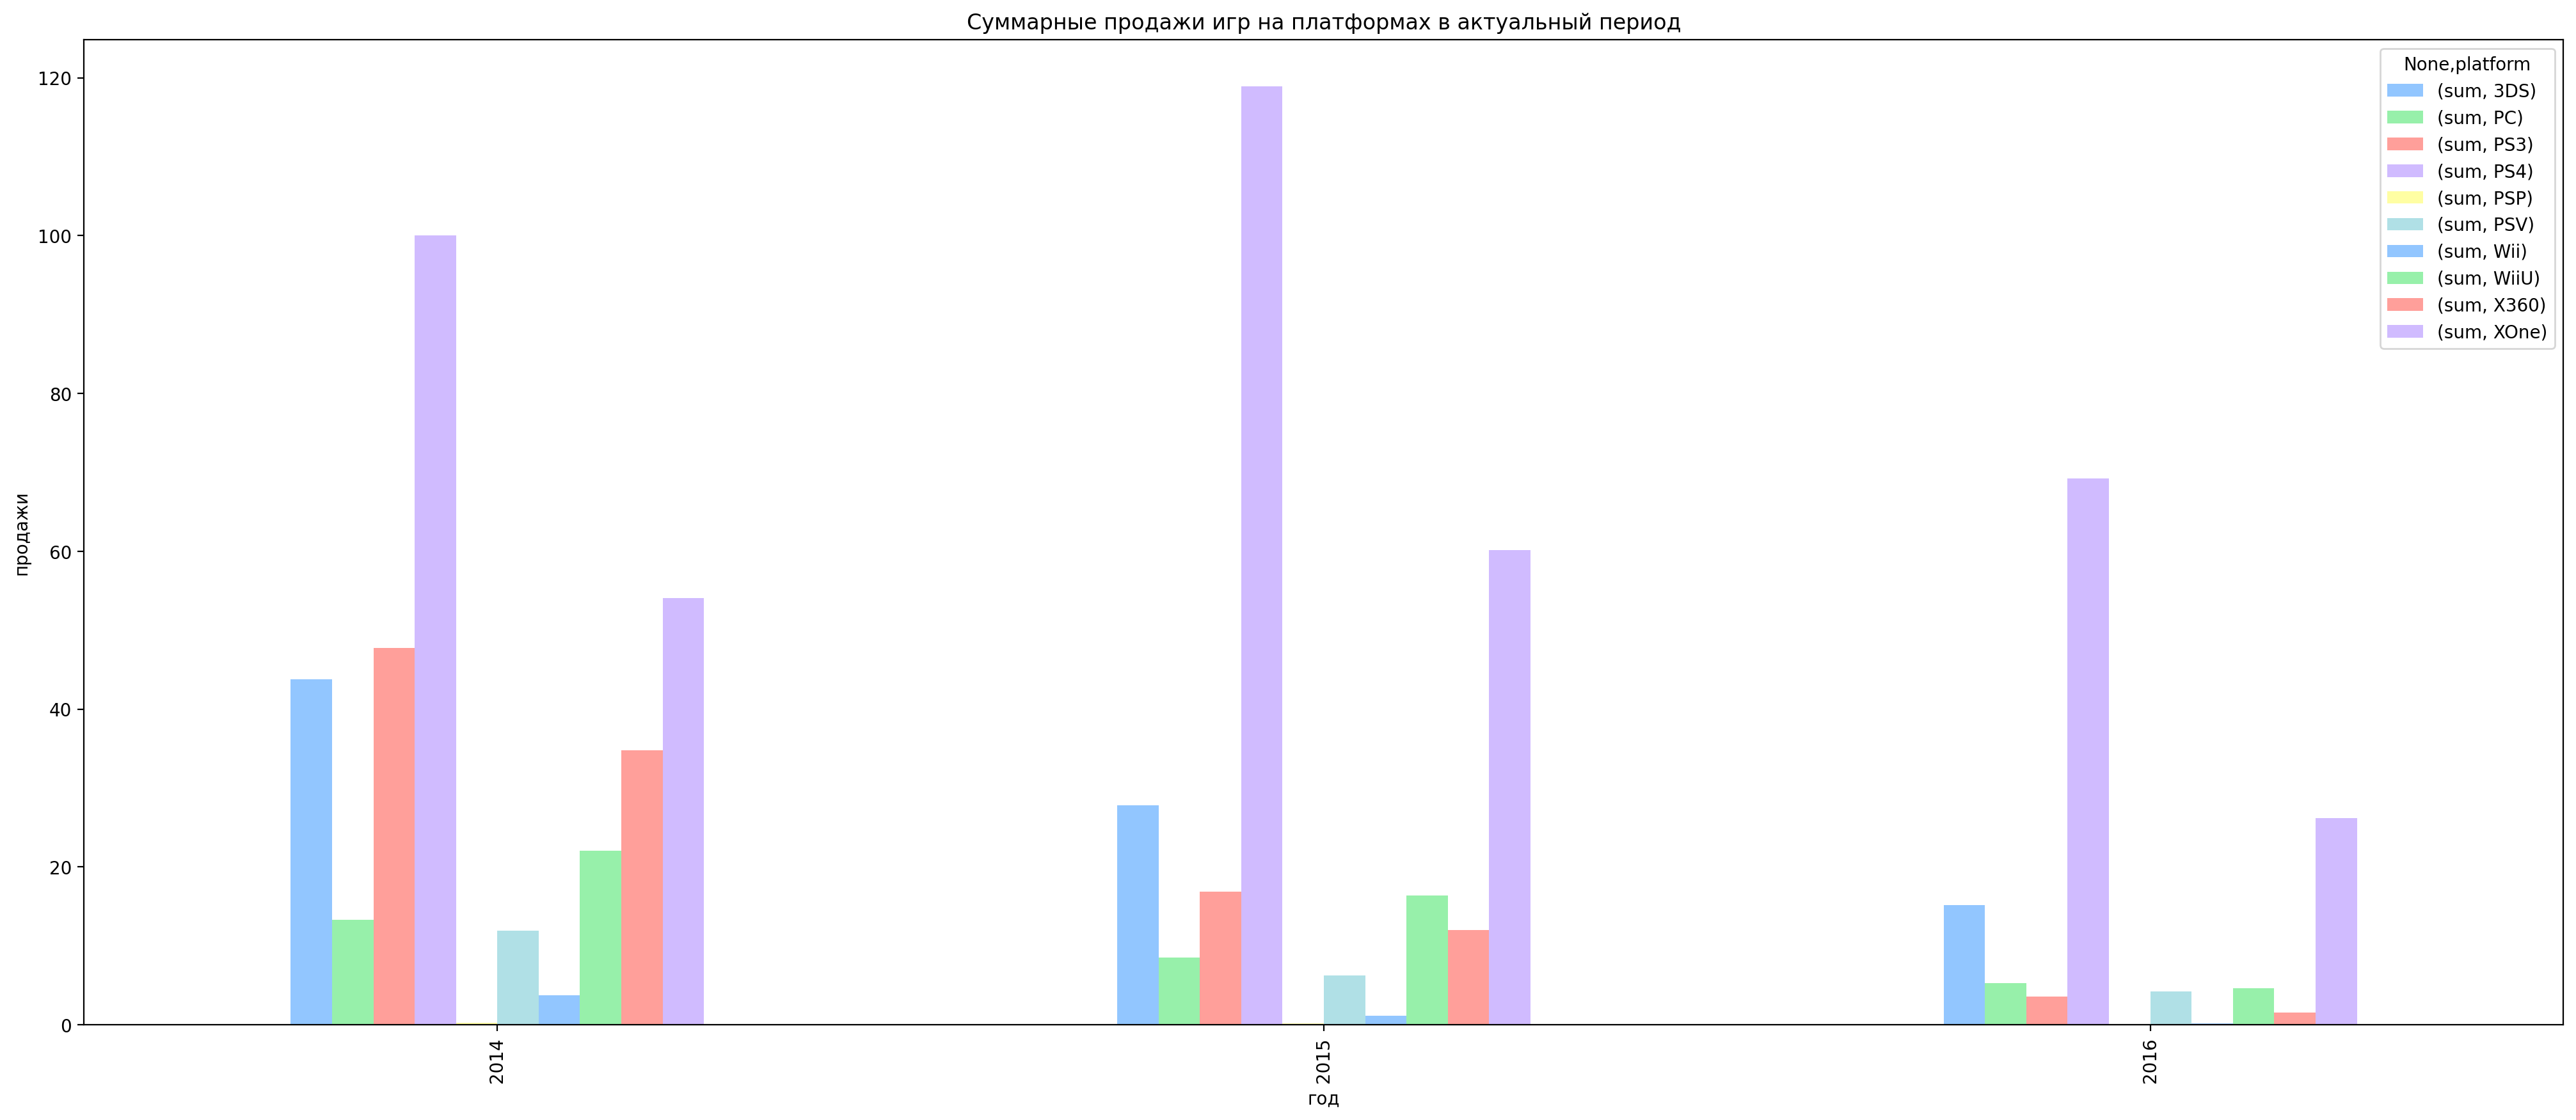

In [23]:
#посмотрим на каких плаформах продажи растут, а на кахих падают

data_pivot_actual_period = data_actual_period.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc=['sum'])

data_pivot_actual_period.plot(kind='bar', figsize=(25,10))
plt.title("Суммарные продажи игр на платформах в актуальный период")
plt.xlabel("год")
plt.ylabel("продажи")
plt.show()

Продажи на платформах: 3DS, PC, PS3, PSV, Wii, WiiU, X360 падают.

Продажи на платформах: PS4, XOne растут.

Таким, образом, потенциально прибыльными выглядят PS4 и XOne.

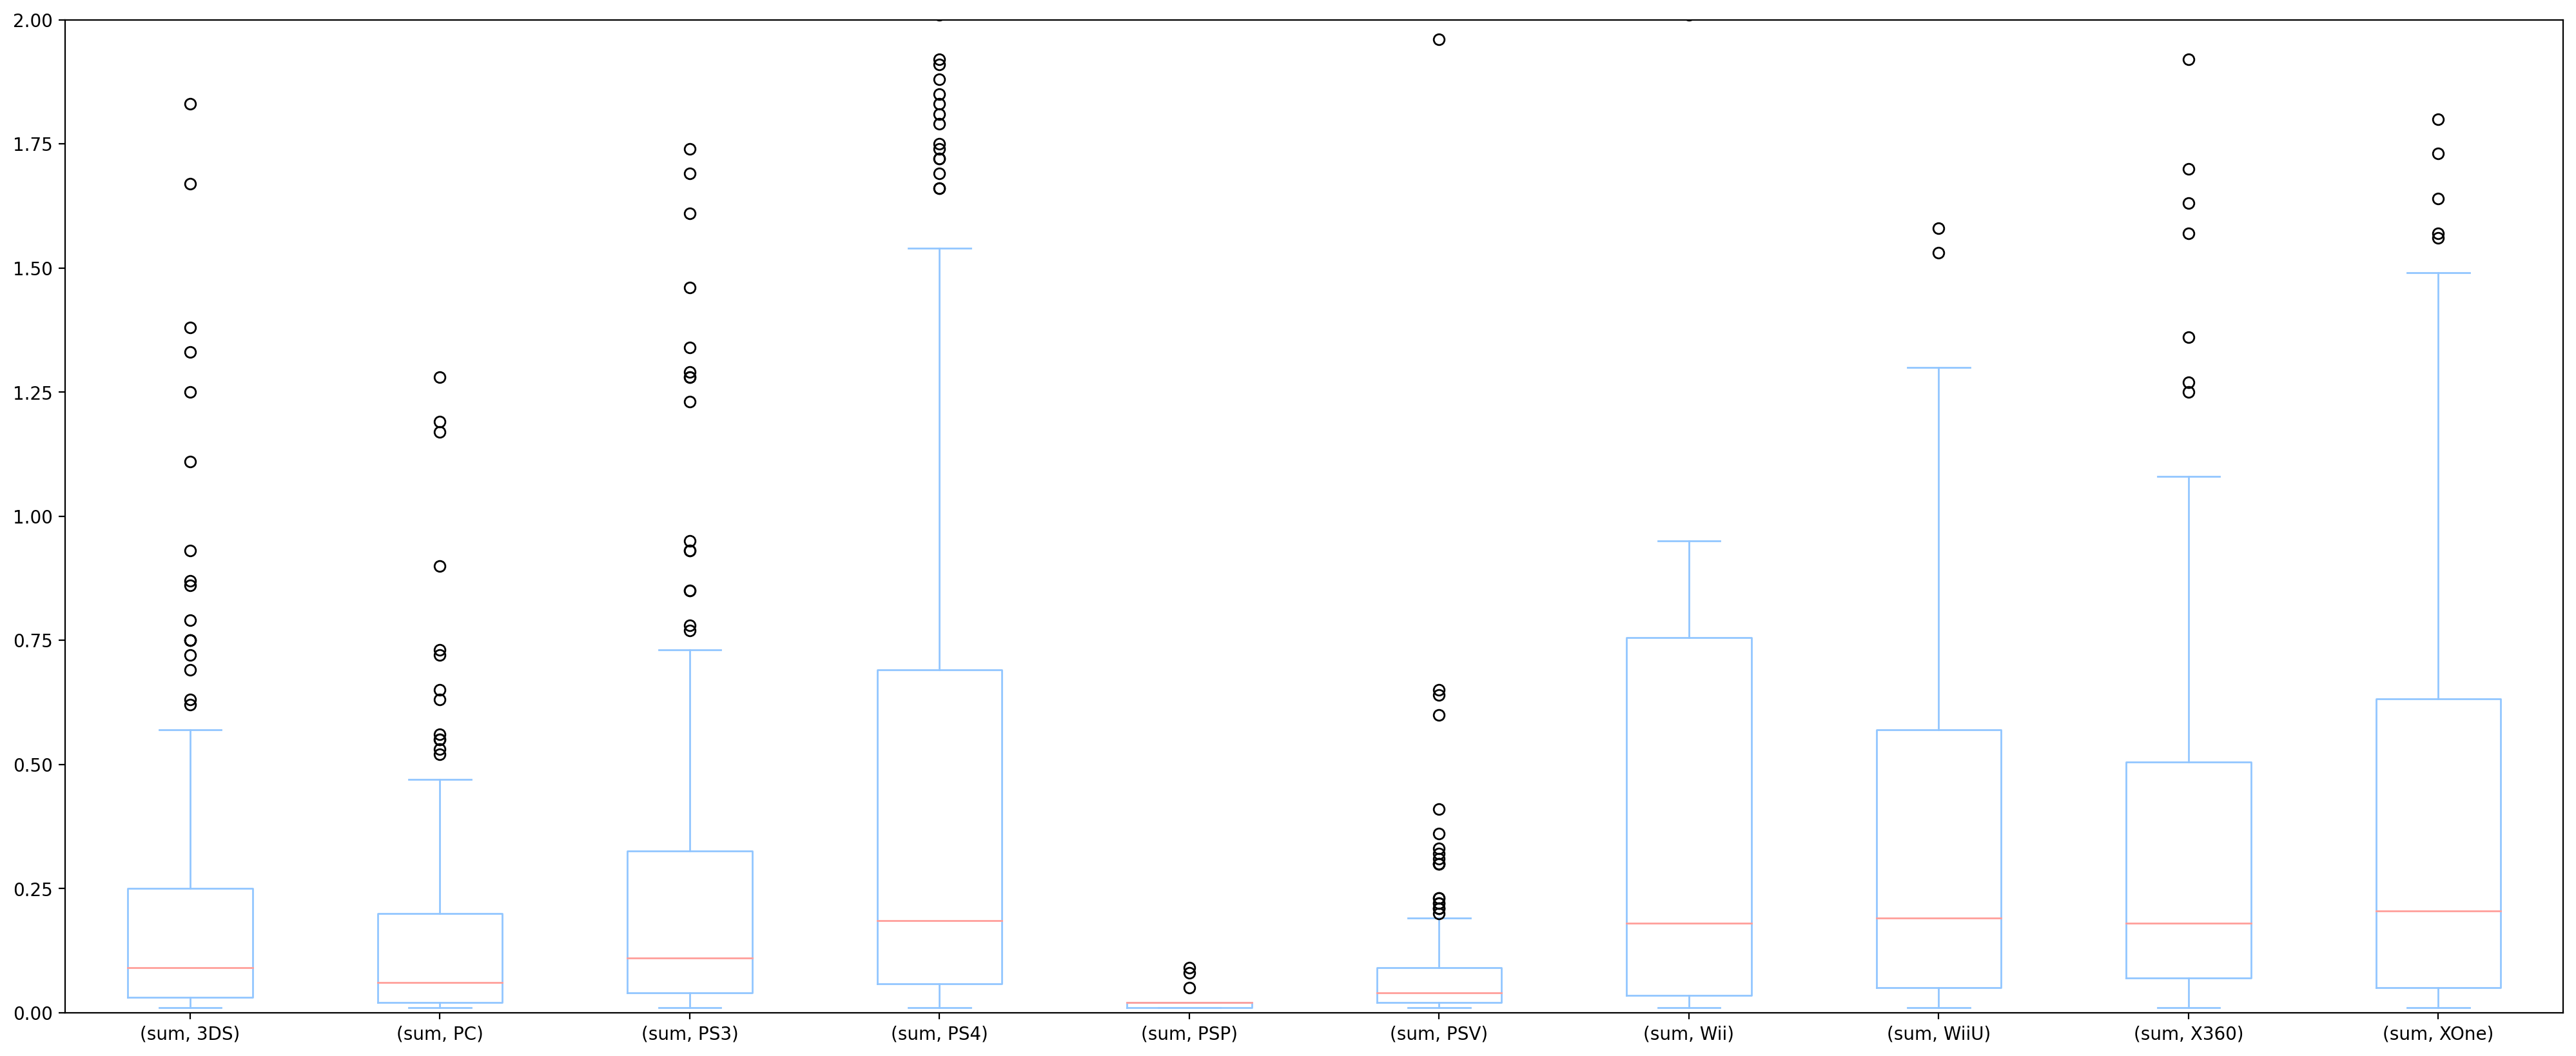

In [24]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

data_actual_period_box = data_actual_period.pivot_table(index = 'name', columns= 'platform', values='total_sales', aggfunc=['sum'])
data_actual_period_box.plot(kind='box', figsize=(25,10))
plt.ylim(0, 2) 
plt.show() 

По графику больше продаж у платформ PS4, XOne, WiiU, X360, Wii, медианное значение у этих платформ схожее.

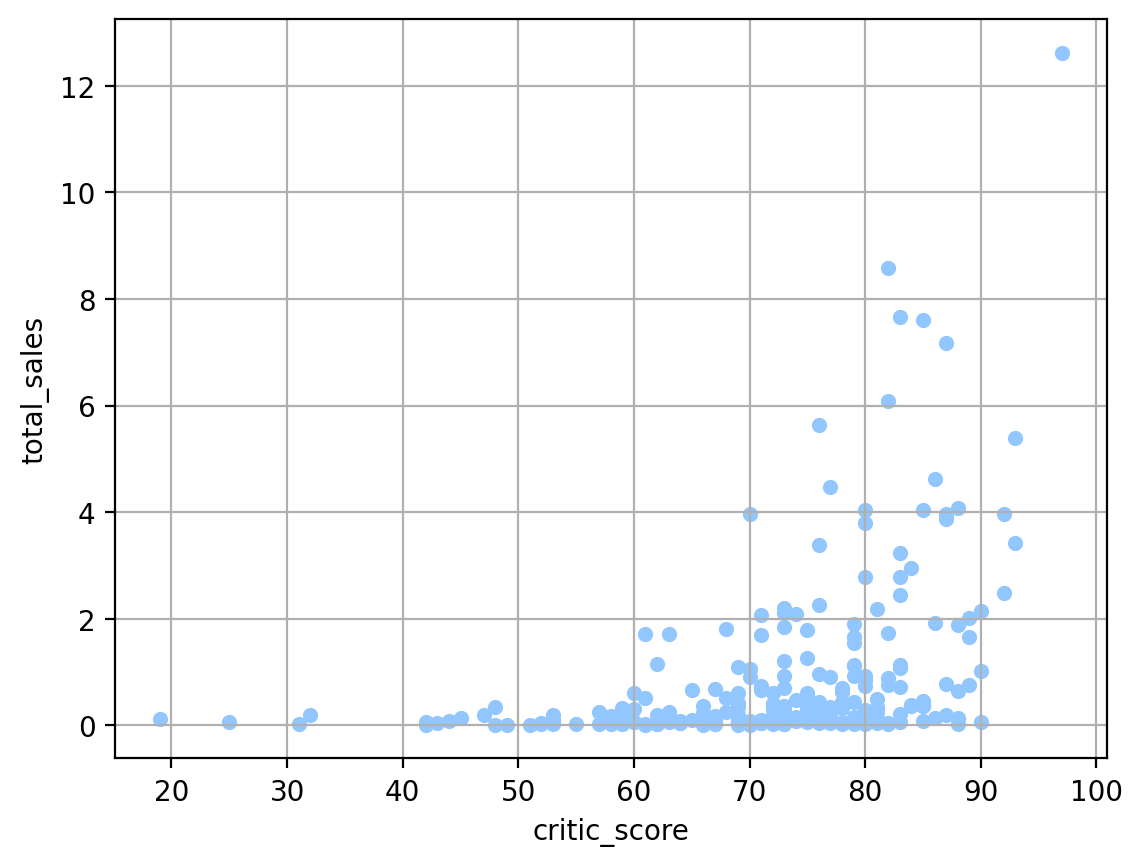

0.40266141068104083

In [25]:
#Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков 

data_one_platform = data_actual_period.query('platform == "PS4"')

#Построим диаграмму рассеяния и посчитаем корреляцию между отзывами критиков и продажами 

data_one_platform.plot(x='critic_score', y='total_sales', kind='scatter', grid = True) 
plt.show() 

data_one_platform['total_sales'].corr(data_one_platform['critic_score'])

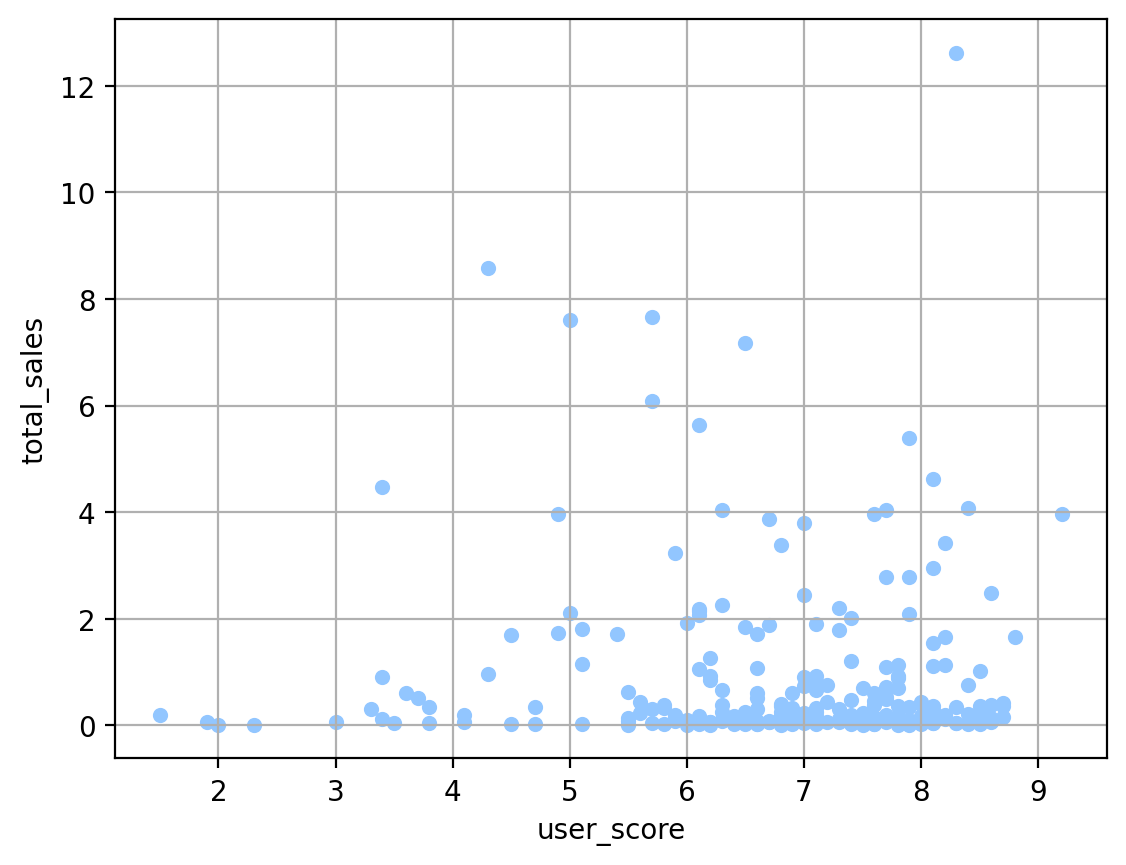

-0.040131589472697356

In [26]:
#Построим диаграмму рассеяния и посчитаем корреляцию между отзывами пользователей и продажами 

data_one_platform.plot(x='user_score', y='total_sales', kind='scatter', grid = True) 
plt.show() 

data_one_platform['total_sales'].corr(data_one_platform['user_score'])

Согласно графикам можно сказать что, чем выше оценки критиков, тем продажи больше, но зависимость между этими параметрами слабая.

Зависимость продаж от оценок пользователей не прослеживается.

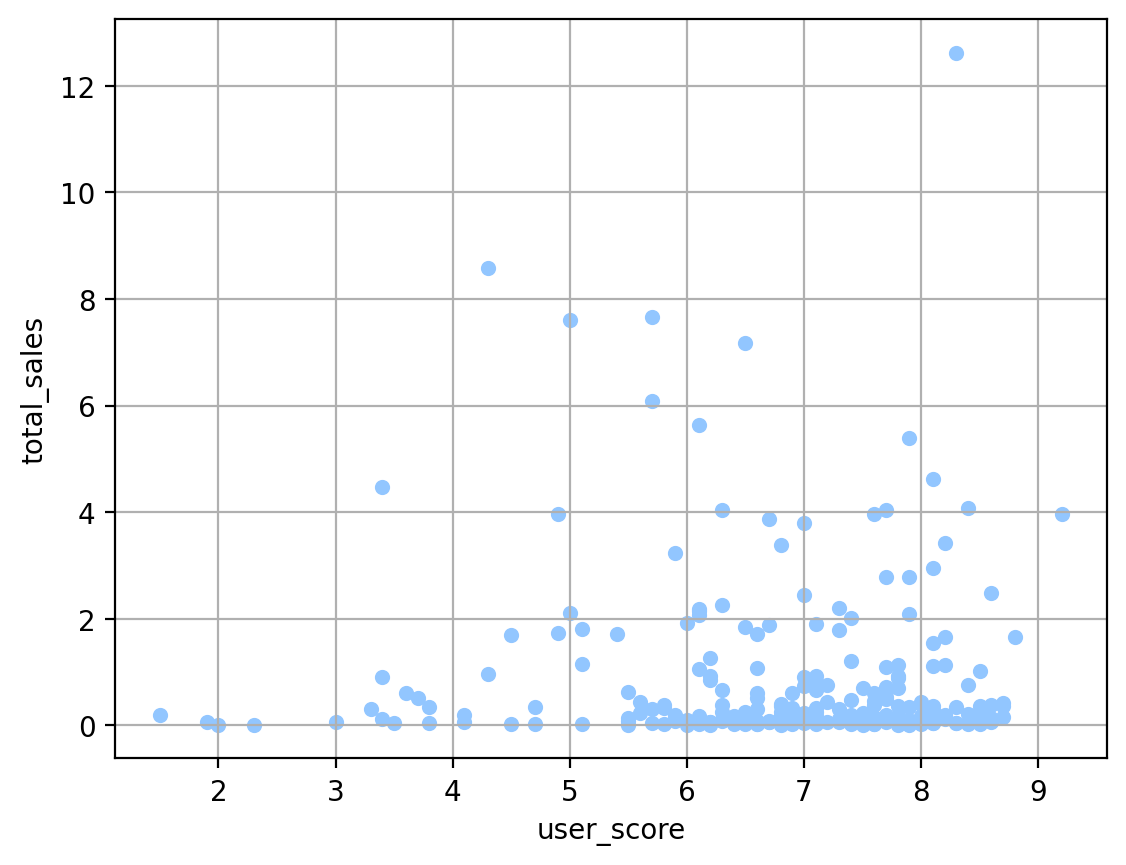

-0.040131589472697356


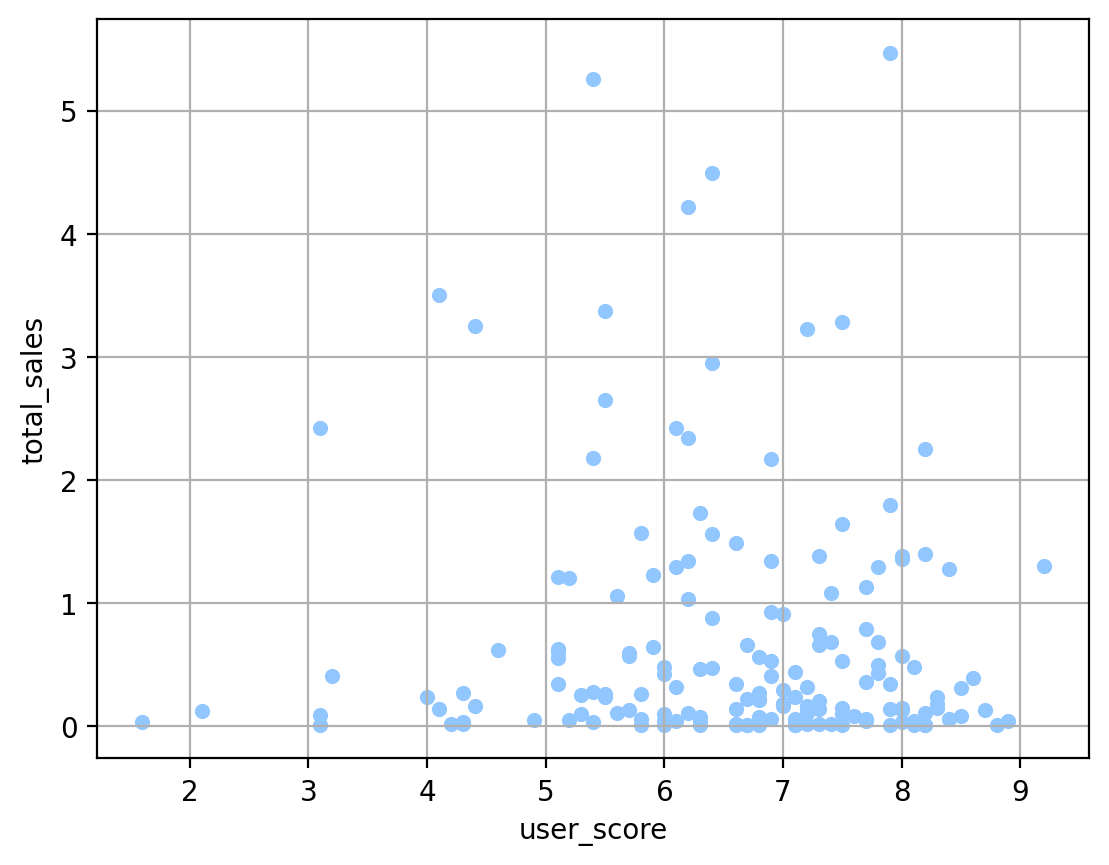

-0.0703839280647581


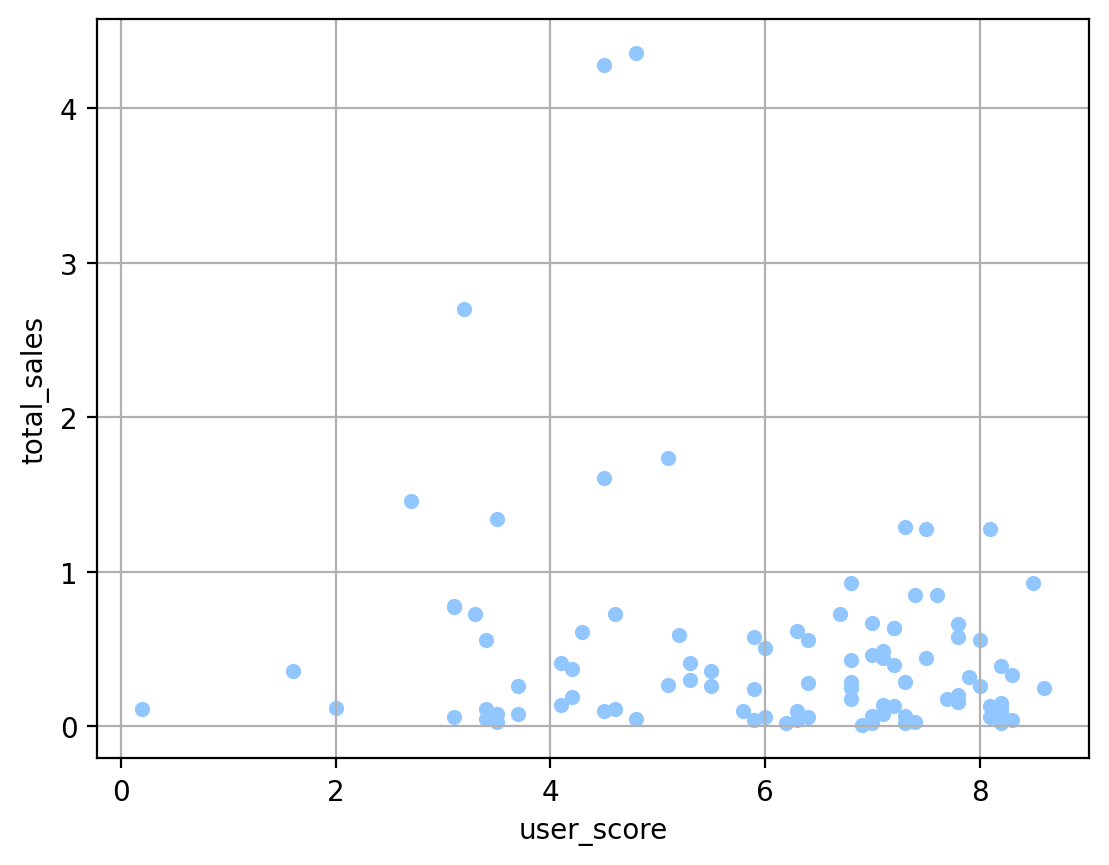

-0.16676141347662116


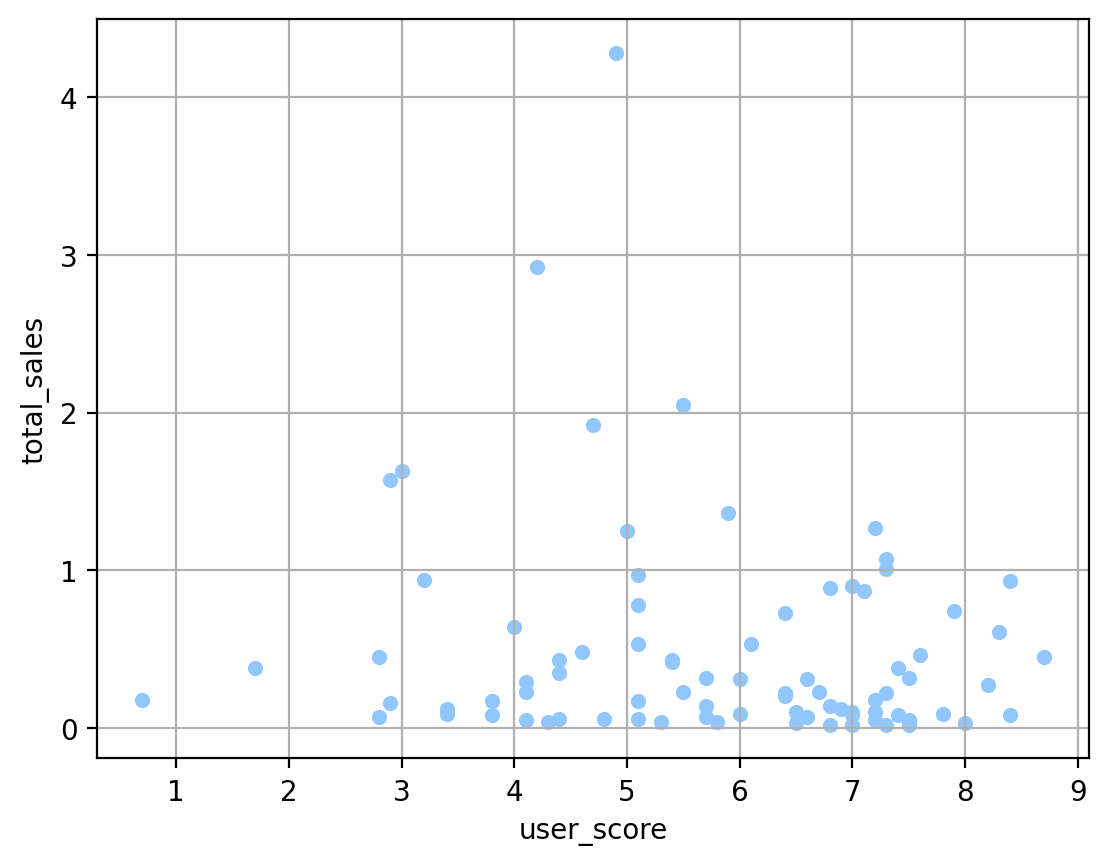

-0.138444570945665


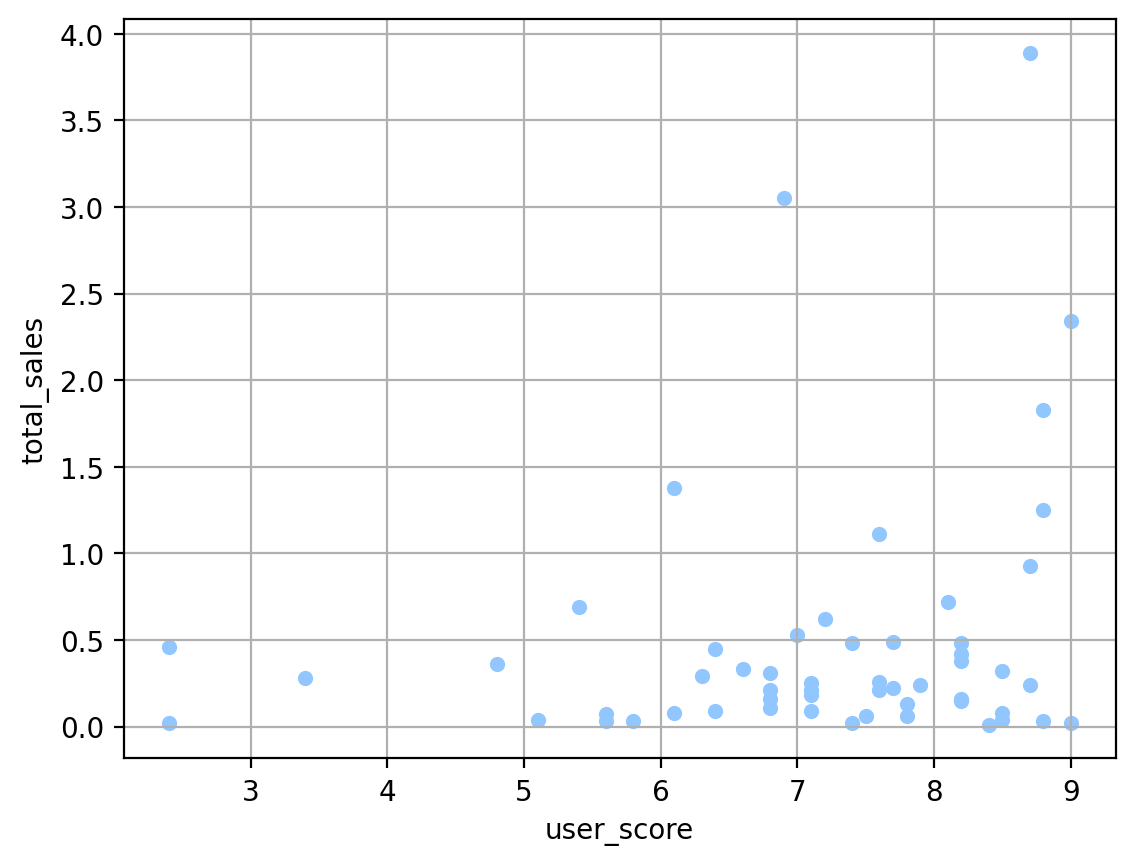

0.2151932718527028


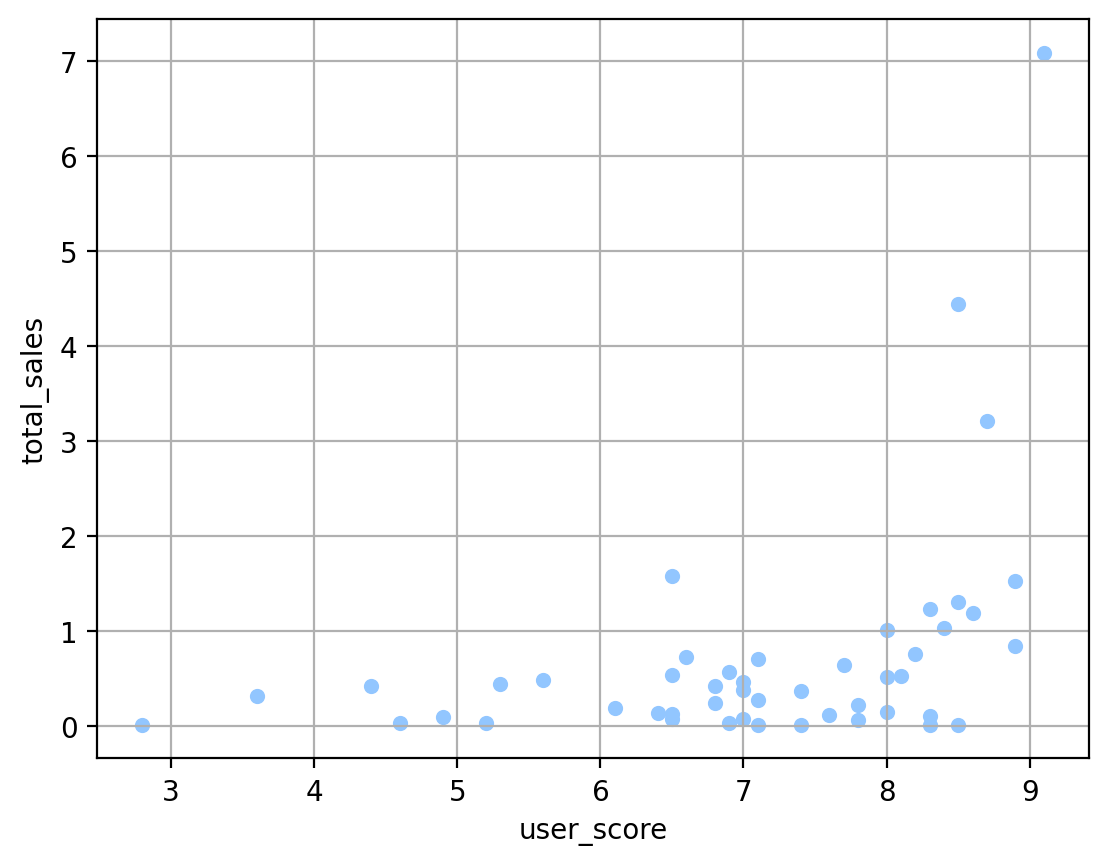

0.4079264579217078


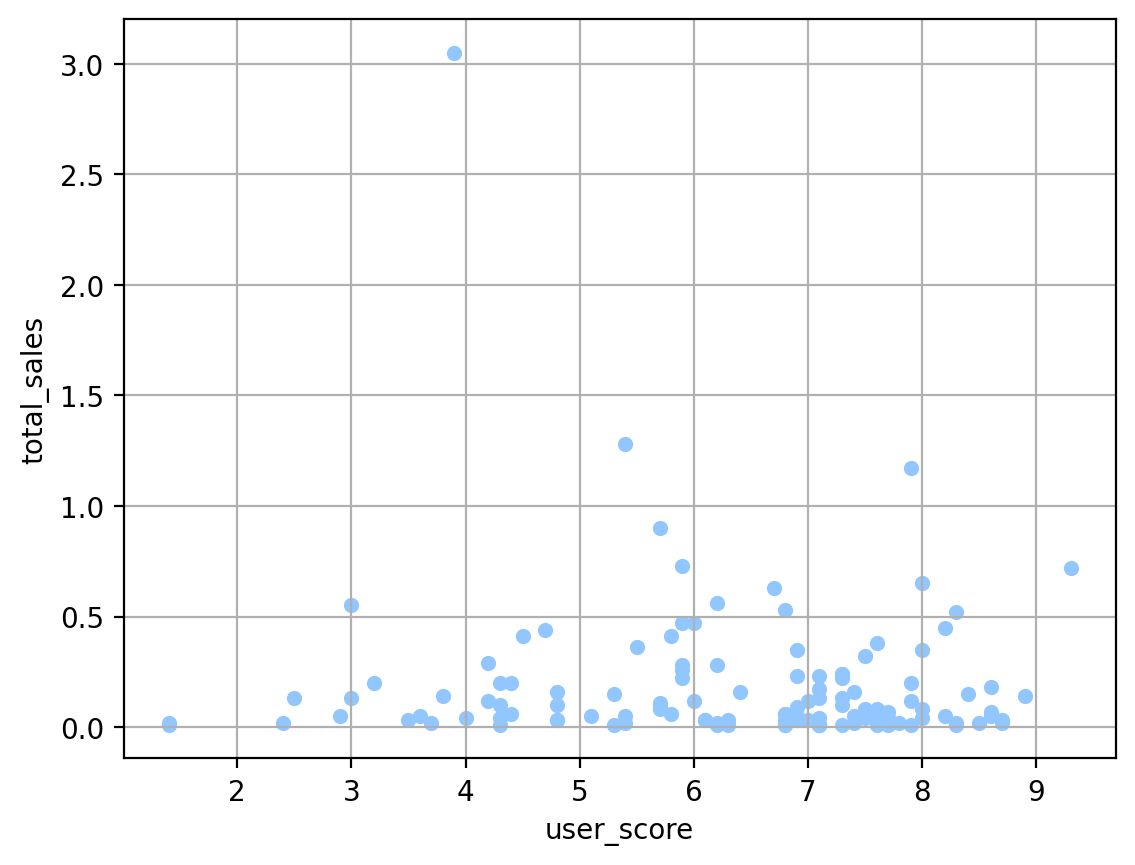

-0.07159665703472452


In [27]:
#Соотнесем выводы с продажами игр на других платформах

data_actual_platform = ['PS4', 'XOne', 'PS3', 'X360', '3DS', 'WiiU', 'PC']

for platform in data_actual_platform:
    data_actual_period.loc[(data_actual_period['platform']==platform)]\
    .plot(x='user_score', y='total_sales', kind='scatter', grid = True)
    plt.show()
    print(data_actual_period.loc[(data_actual_period['platform']==platform),'total_sales']\
          .corr(data_actual_period.loc[(data_actual_period['platform']==platform), 'user_score']))

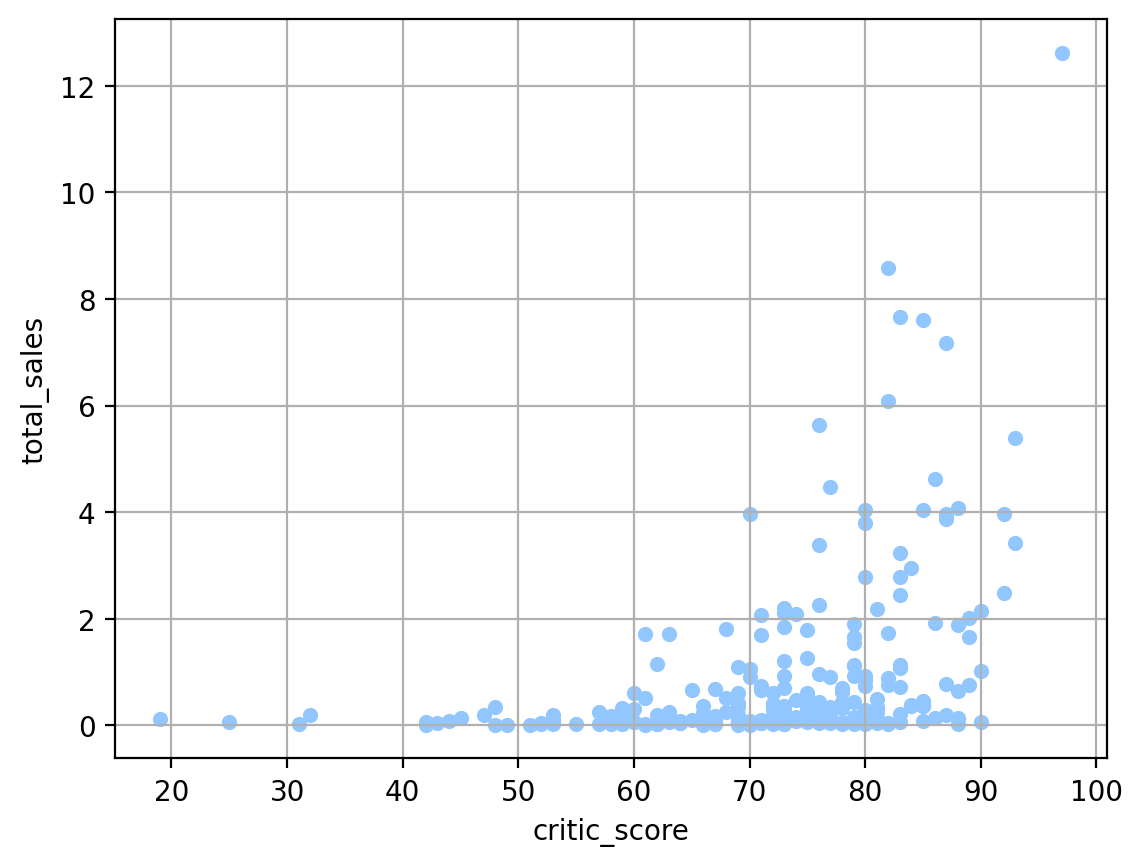

0.40266141068104083


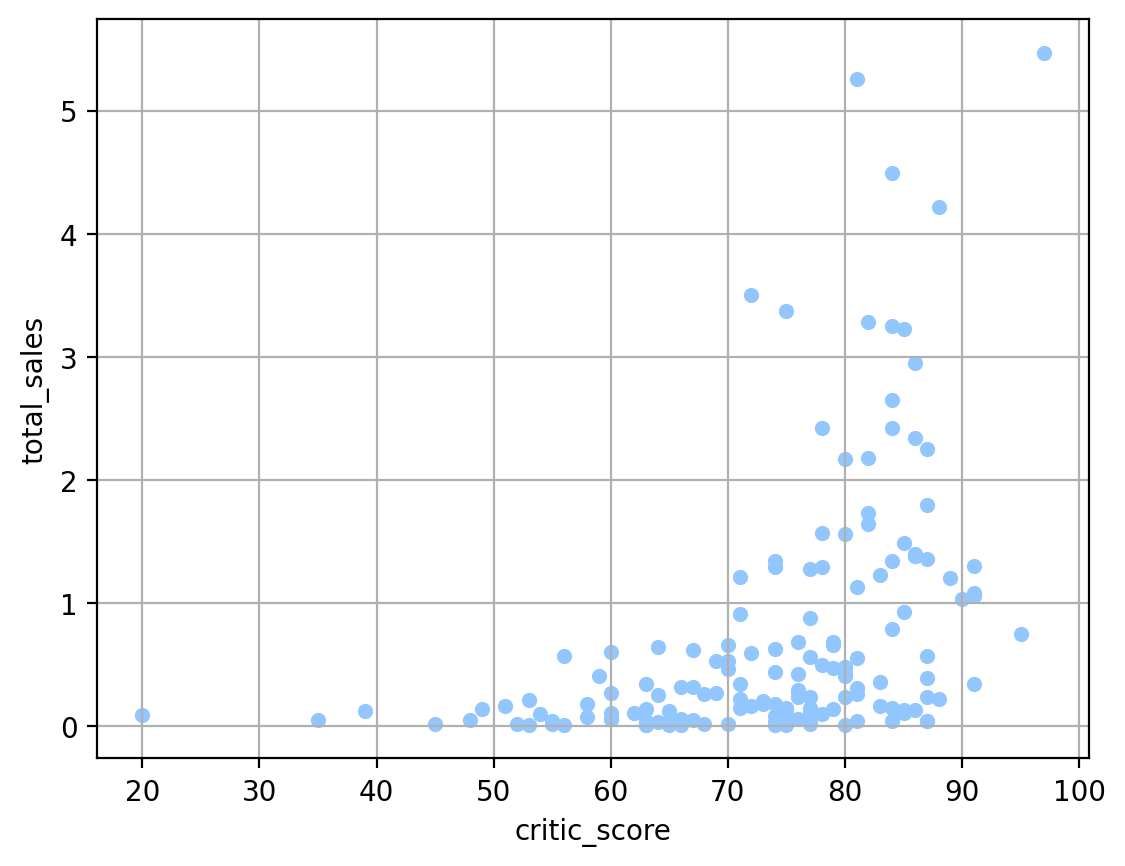

0.42867694370333226


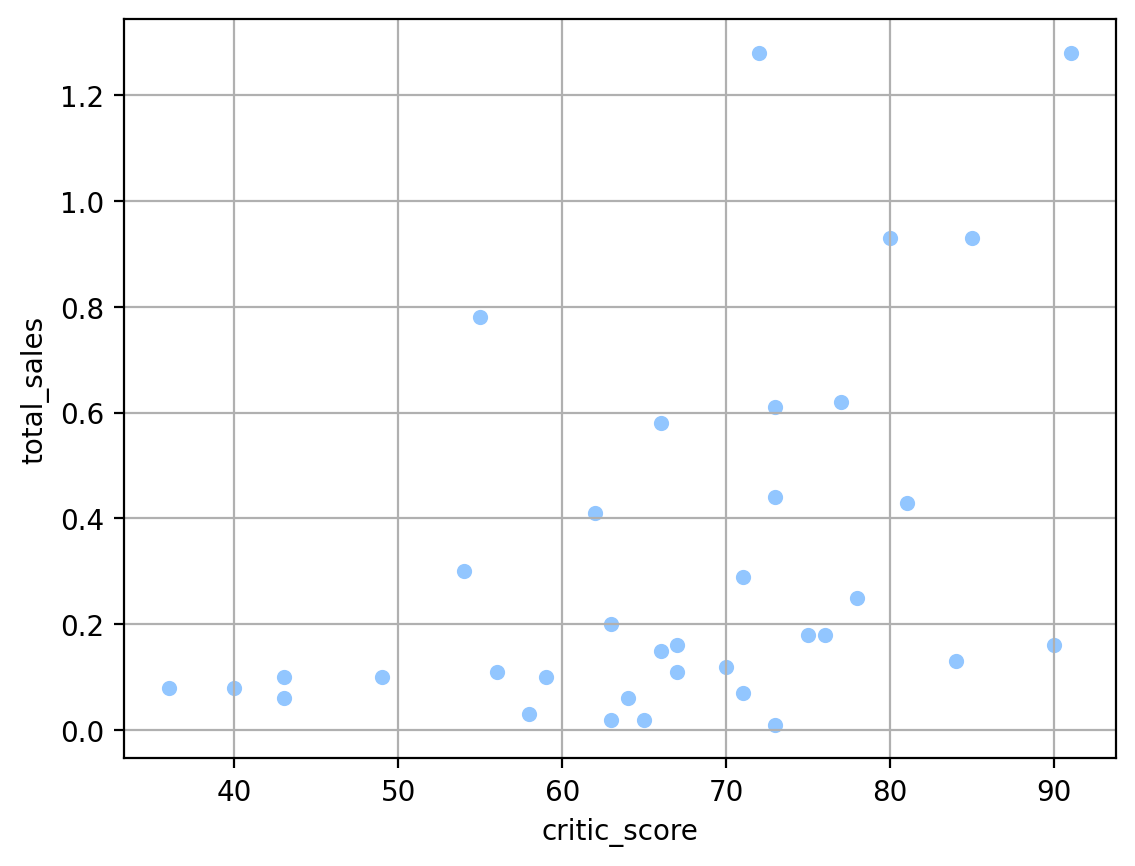

0.44657460493190704


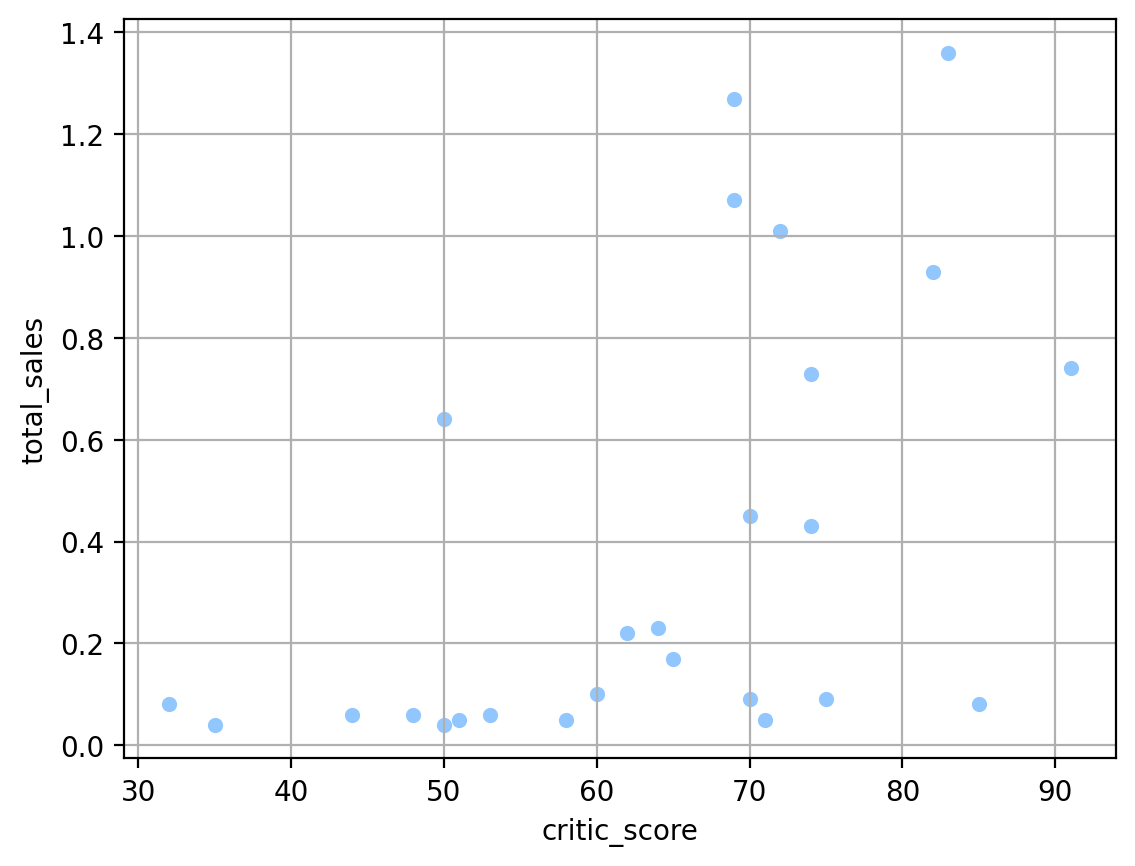

0.5257228356581523


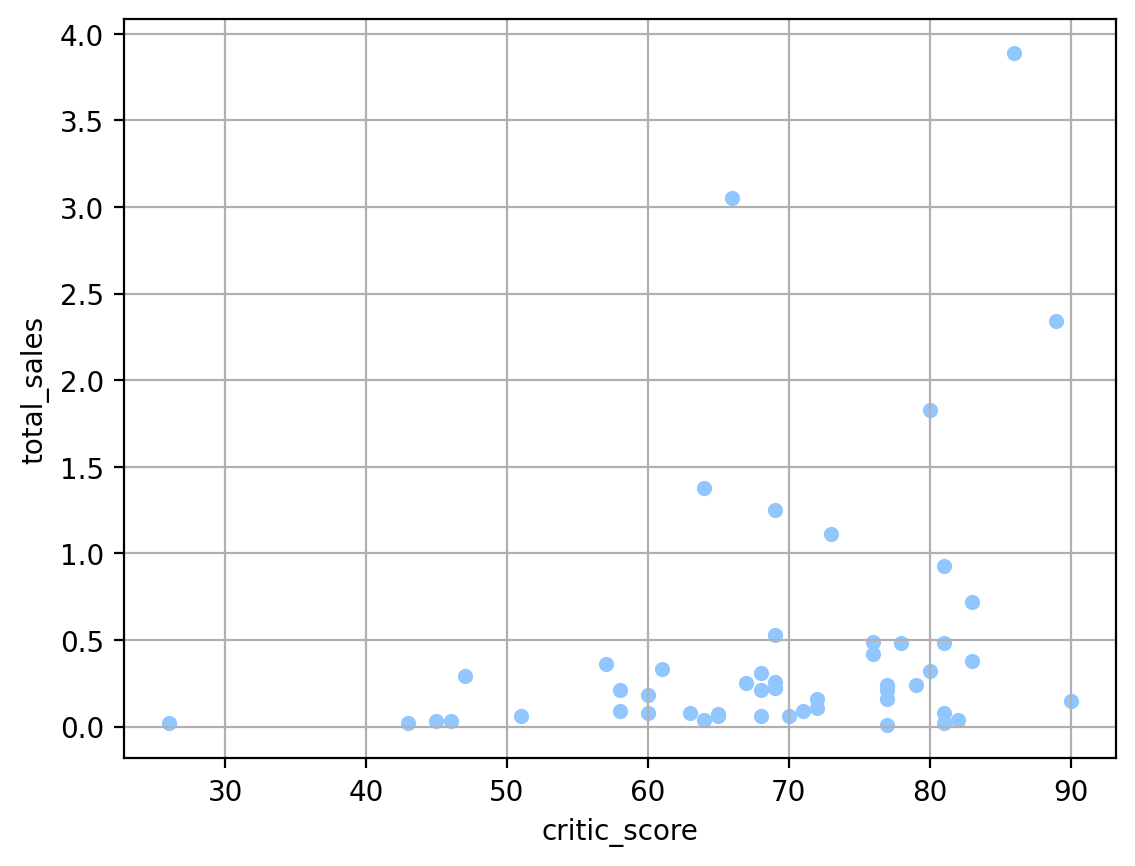

0.31411749286905105


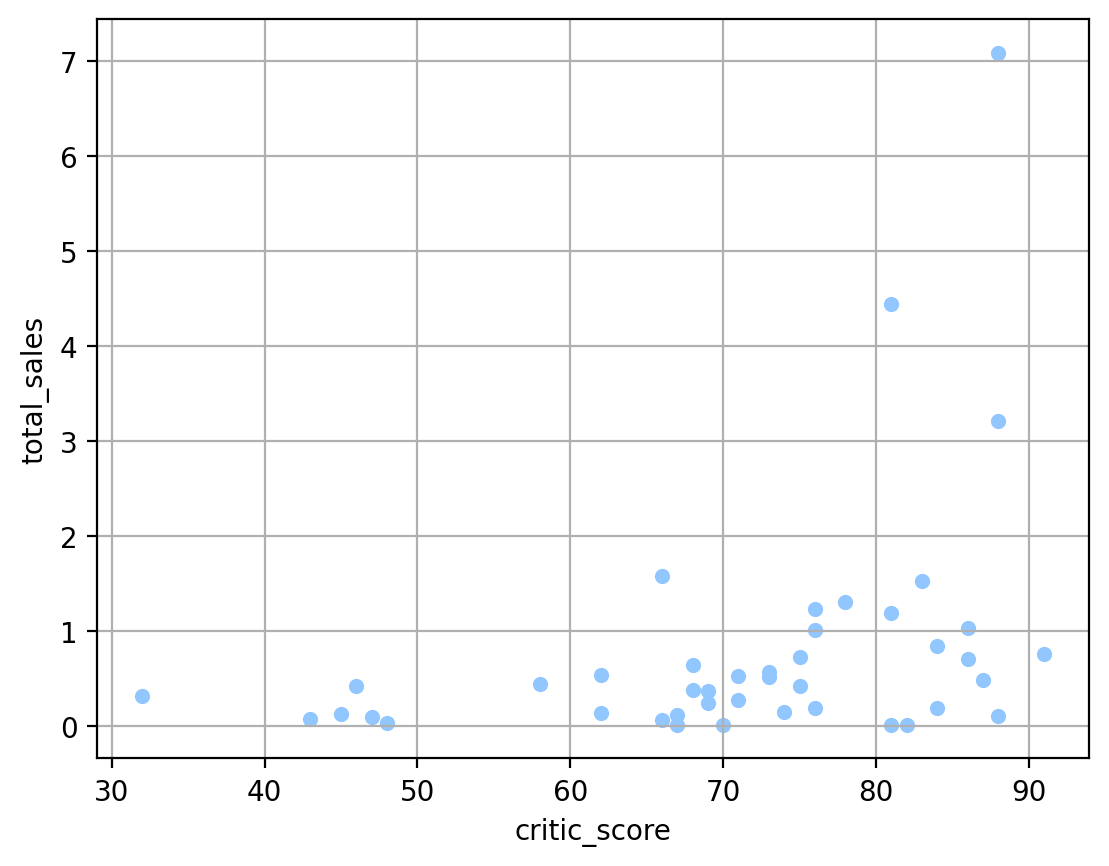

0.370201412480884


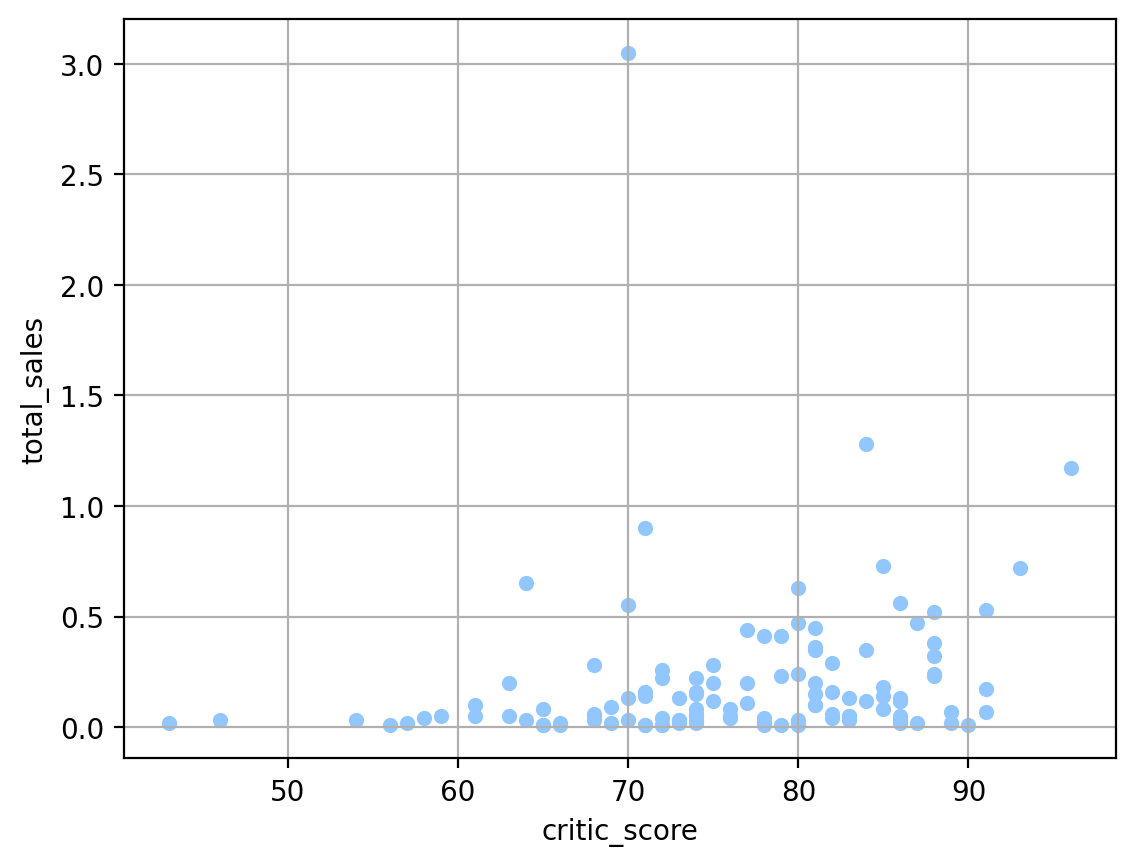

0.17463413769350036


In [28]:
for platform in data_actual_platform:
    data_actual_period.loc[(data_actual_period['platform']==platform)]\
    .plot(x='critic_score', y='total_sales', kind='scatter', grid = True)
    plt.show()
    print(data_actual_period.loc[(data_actual_period['platform']==platform),'total_sales']\
          .corr(data_actual_period.loc[(data_actual_period['platform']==platform), 'critic_score']))

Данные на других популярных платформах подтверждают сделанные ранее выводы.

Исключениями являются: платформа WiiU - зависимость продаж от оценок пользователей на ней оказалась выше, чем от оценок критиков, и на платформе 3DS зависимость от оценок пользователей чуть выше чем на остальных платформах, но остается меньше чем от оценок критиков.

In [29]:
#Посмотрим на общее распределение игр по жанрам

genre_distribution = data_actual_period.pivot_table(index = 'genre', values='total_sales', aggfunc=['sum'])
genre_distribution.columns = ['sum']
genre_distribution = genre_distribution.sort_values(by='sum', ascending=False)
genre_distribution

,sum
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


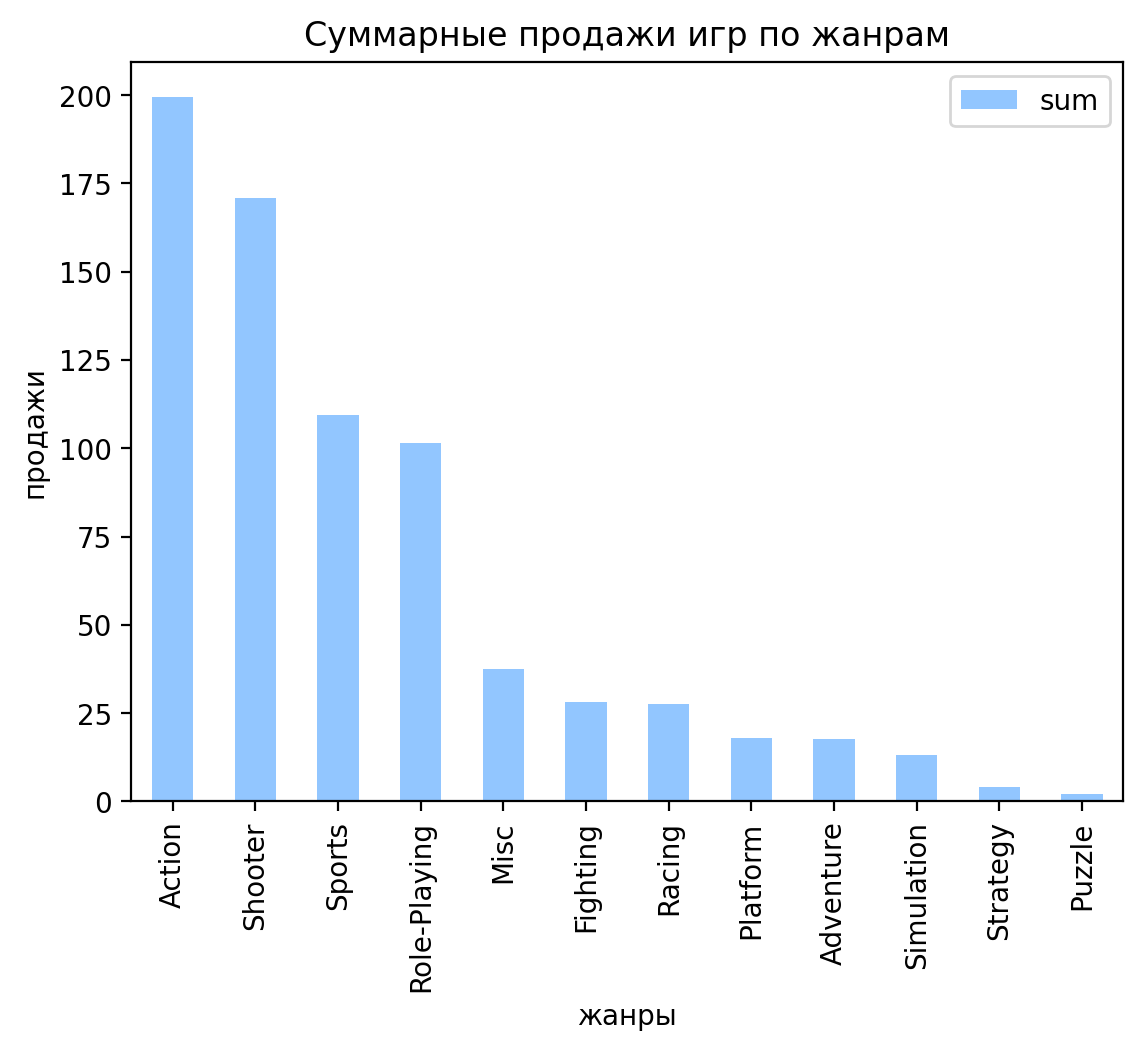

In [30]:
genre_distribution.plot(kind='bar')
plt.title("Суммарные продажи игр по жанрам")
plt.xlabel("жанры")
plt.ylabel("продажи")
plt.show()

За высокими показателями суммарных продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 популярные игры и куча провальных. Поэтому лучше найдем жанры, где игры стабильно приносят высокий доход - для этого рассмотрим средние и медианные продажи.

In [31]:
#рассмоторим средние и медианные продажи по жанрам

profit_genre = data_actual_period.pivot_table(index = 'genre', values='total_sales', aggfunc=['mean', 'median'])
profit_genre.columns = ['mean', 'median']
profit_genre = profit_genre.sort_values(by='mean', ascending=False)
profit_genre

,mean,median
genre,,
Shooter,1.335469,0.515
Sports,0.680000,0.180
Platform,0.476053,0.140
Fighting,0.470333,0.125
Role-Playing,0.459005,0.110
Racing,0.398841,0.090
Misc,0.332301,0.090
Action,0.322068,0.090
Simulation,0.298409,0.100


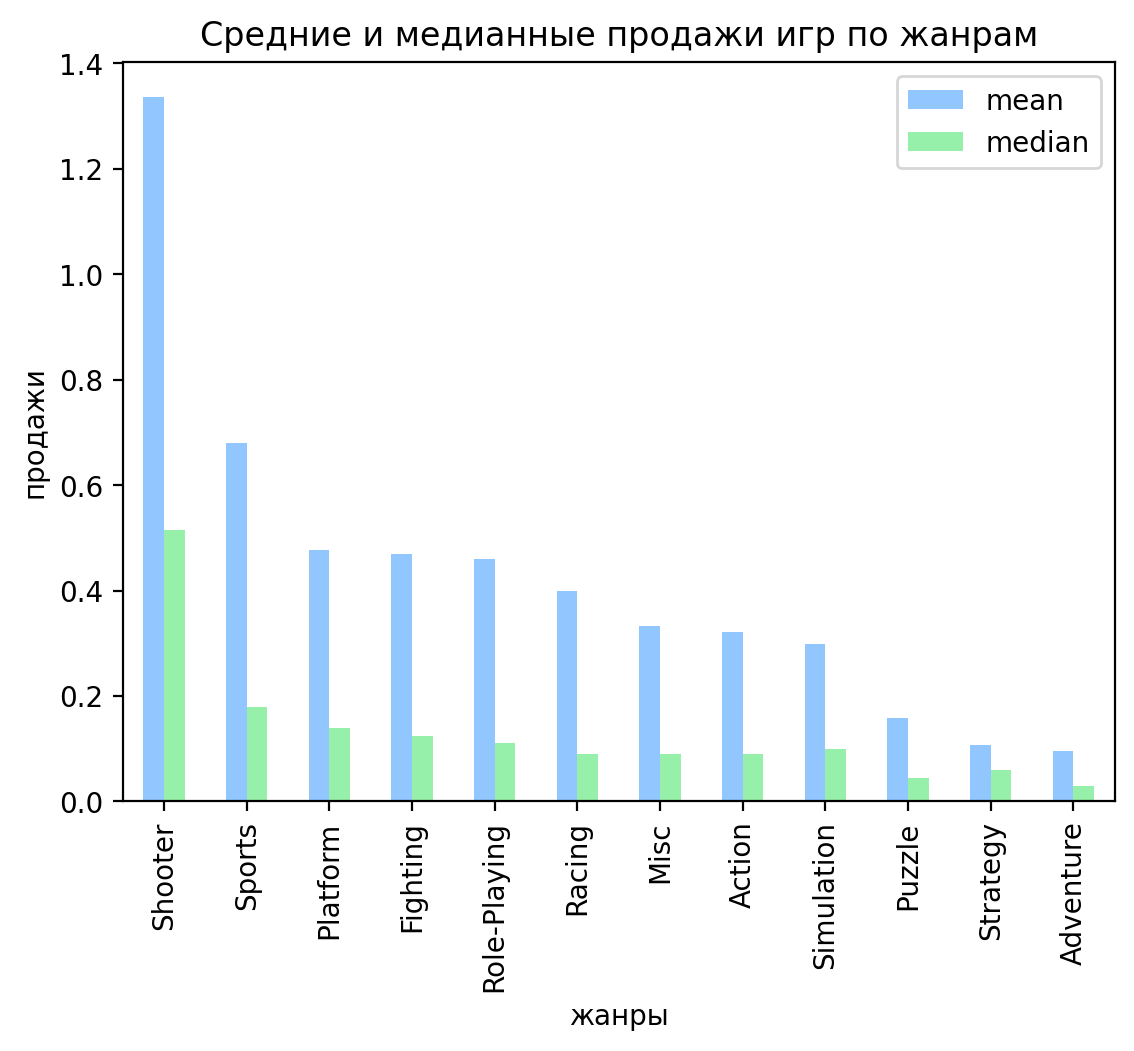

In [32]:
profit_genre.plot(kind='bar')
plt.title("Средние и медианные продажи игр по жанрам")
plt.xlabel("жанры")
plt.ylabel("продажи")
plt.show()

Таким образом, стабильно приносят доход игры в таких жанрах как Shooter, Sports, Platform, Fighting и Role-Playing.	

А вот у игр в жанрах Puzzle, Strategy и Adventure низкие продажи.

## Портрет пользователя каждого региона

In [33]:
#определим для пользователя Северной Америки cамые популярные платформы (топ-5)

na_user = data_actual_period.groupby(['platform']).agg({'na_sales':['sum']})
na_user.columns = ['sum']
na_user.sort_values(by='sum', ascending=False).head()

,sum
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


In [34]:
#определим для пользователя Европы cамые популярные платформы (топ-5)

eu_user = data_actual_period.groupby(['platform']).agg({'eu_sales':['sum']})
eu_user.columns = ['sum']
eu_user.sort_values(by='sum', ascending=False).head()

,sum
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


In [35]:
#определим для пользователя Японии cамые популярные платформы (топ-5)

jp_user = data_actual_period.groupby(['platform']).agg({'jp_sales':['sum']})
jp_user.columns = ['sum']
jp_user.sort_values(by='sum', ascending=False).head()

,sum
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


In [36]:
#опишем различия в долях продаж относительно глобального рынка 

#создадим список самых популярных платформ по всем регионам

list_top_platform_total = ['PS4', 'XOne', 'X360', '3DS', 'PS3', 'PC', 'PSV', 'WiiU']

#сделаем срез данных по списку платформ

user = data_actual_period.query('platform in @list_top_platform_total')

#построим сводную таблицу по платформам и посчитаем сумму продаж на рынках Северной Америки, Европы, Японии и оставшихся других регионов

user = user.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'], aggfunc='sum')

#добавим столбцы и расчитаем долю продаж по каждому региону от общих продаж

user['na_sales_share'] = round(user['na_sales'] / user['total_sales']*100, 1)
user['eu_sales_share'] = round(user['eu_sales'] / user['total_sales']*100, 1)
user['jp_sales_share'] = round(user['jp_sales'] / user['total_sales']*100, 1)
user['other_sales_share'] = round(user['other_sales'] / user['total_sales']*100, 1)
user.sort_values(by='total_sales', ascending=False)

,eu_sales,jp_sales,na_sales,other_sales,total_sales,na_sales_share,eu_sales_share,jp_sales_share,other_sales_share
platform,,,,,,,,,
PS4,130.04,15.02,98.61,44.48,288.15,34.2,45.1,5.2,15.4
XOne,46.25,0.32,81.27,12.52,140.36,57.9,33.0,0.2,8.9
3DS,16.12,44.24,22.64,3.68,86.68,26.1,18.6,51.0,4.2
PS3,25.54,11.22,22.05,9.37,68.18,32.3,37.5,16.5,13.7
X360,15.49,0.08,28.30,4.35,48.22,58.7,32.1,0.2,9.0
WiiU,13.15,7.31,19.36,3.16,42.98,45.0,30.6,17.0,7.4
PC,17.97,0.00,7.23,1.85,27.05,26.7,66.4,0.0,6.8
PSV,3.53,14.54,2.52,1.81,22.40,11.2,15.8,64.9,8.1


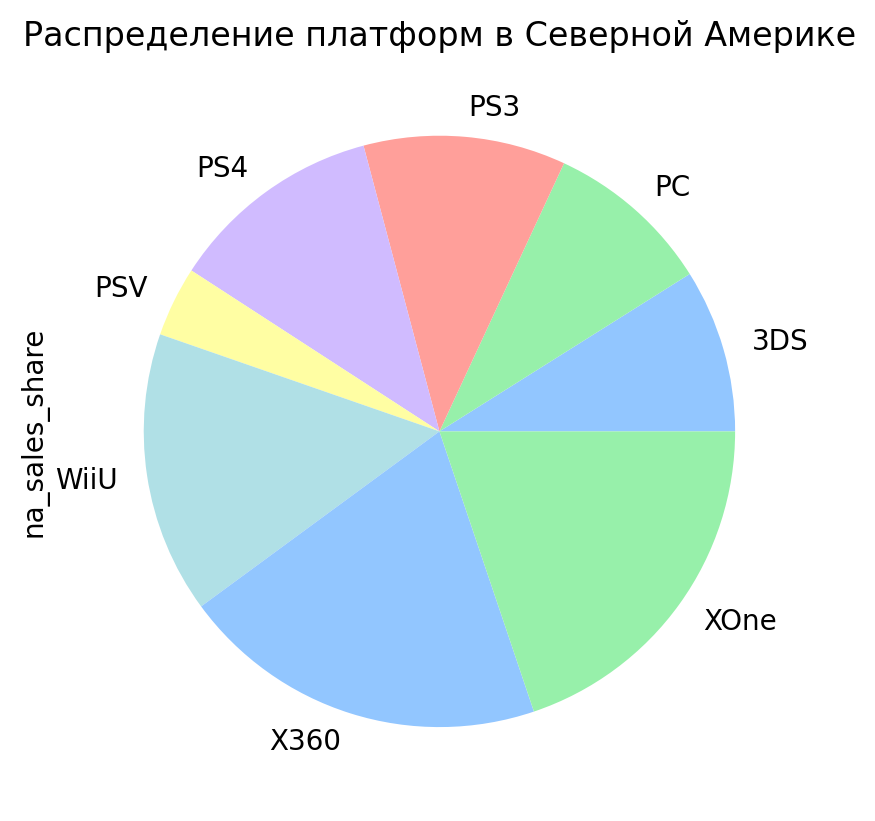

In [37]:
#посмотрим на диаграмме распределение платформ в Северной Америке

user['na_sales_share'].plot(title = 'Распределение платформ в Северной Америке', kind='pie')
plt.show()

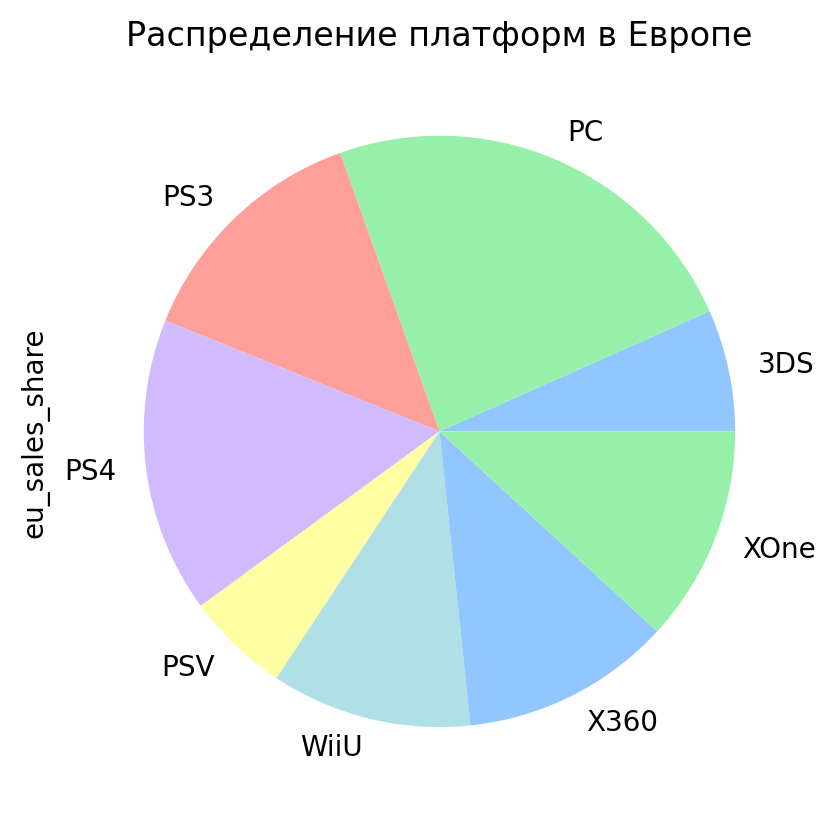

In [38]:
#посмотрим на диаграмме распределение платформ в Европе

user['eu_sales_share'].plot(title = 'Распределение платформ в Европе', kind='pie')
plt.show()

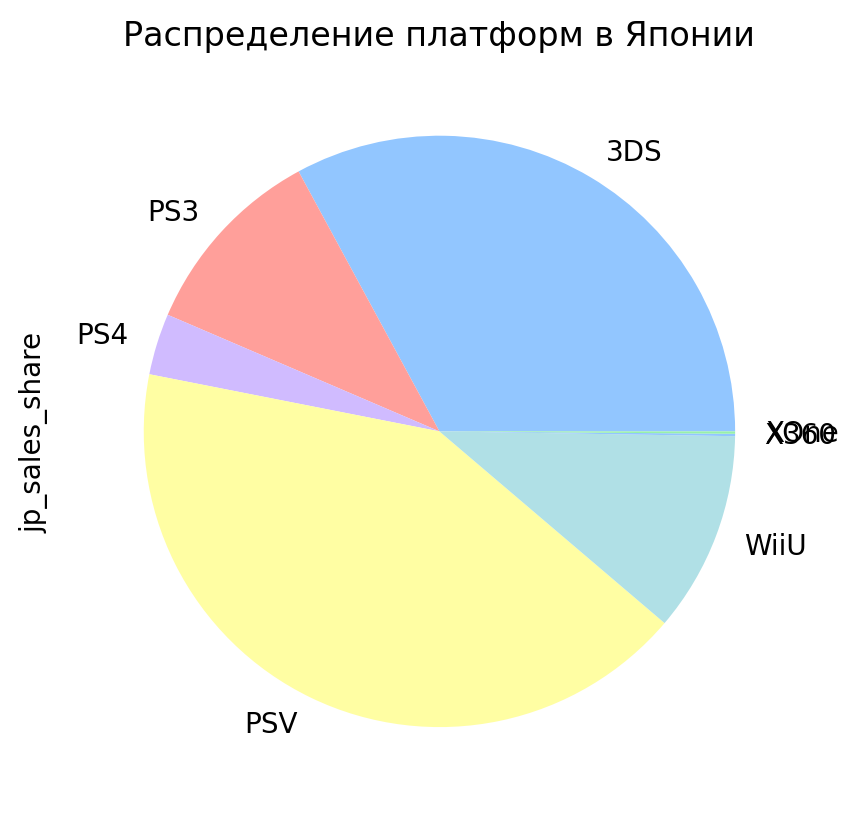

In [39]:
#посмотрим на диаграмме распределение платформ в Японии

user['jp_sales_share'].plot(title = 'Распределение платформ в Японии', kind='pie')
plt.show()

Таким образом, рынки Европы и Северной Америки в целом схожи, там основные доли продаж приходятся на PS4, PS3, XOne, X360, WiiU, однако для Европы еще и значительную часть составляет PC (персональный компьютер).

Наибольшие различия мы можем видеть на рынке Японии.

Доли продаж на платформе PC вообще нет, XOne, X360 - очень мала, PS4, PS3 - больше, а самые большие доли у: 3DS, PSV, WiiU.


In [40]:
#определим для пользователя Северной Америки cамые популярные жанры (топ-5)

na_user_genre = data_actual_period.groupby(['genre']).agg({'na_sales':['sum']})
na_user_genre.columns = ['sum']
na_user_genre.sort_values(by='sum', ascending=False).head()

,sum
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


In [41]:
#определим для пользователя Европы cамые популярные жанры (топ-5)

eu_user_genre = data_actual_period.groupby(['genre']).agg({'eu_sales':['sum']})
eu_user_genre.columns = ['sum']
eu_user_genre.sort_values(by='sum', ascending=False).head()

,sum
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


In [42]:
#определим для пользователя Японии cамые популярные жанры (топ-5)

jp_user_genre = data_actual_period.groupby(['genre']).agg({'jp_sales':['sum']})
jp_user_genre.columns = ['sum']
jp_user_genre.sort_values(by='sum', ascending=False).head()

,sum
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


И вновь по жанрам пользователи Северной Америки и Европы схожи в предпочтениях, лидируют Action, Shooter и Sports. 

А вот пользователи в Японии выбирают больше жанры Role-Playing, Action и Fighting.	

           eu_sales  jp_sales  na_sales
rating                                 
E             58.06      8.94     50.74
E10+          26.16      4.46     33.23
M             93.44      8.01     96.42
T             34.07     14.78     38.95
no_rating     58.95     56.90     64.72


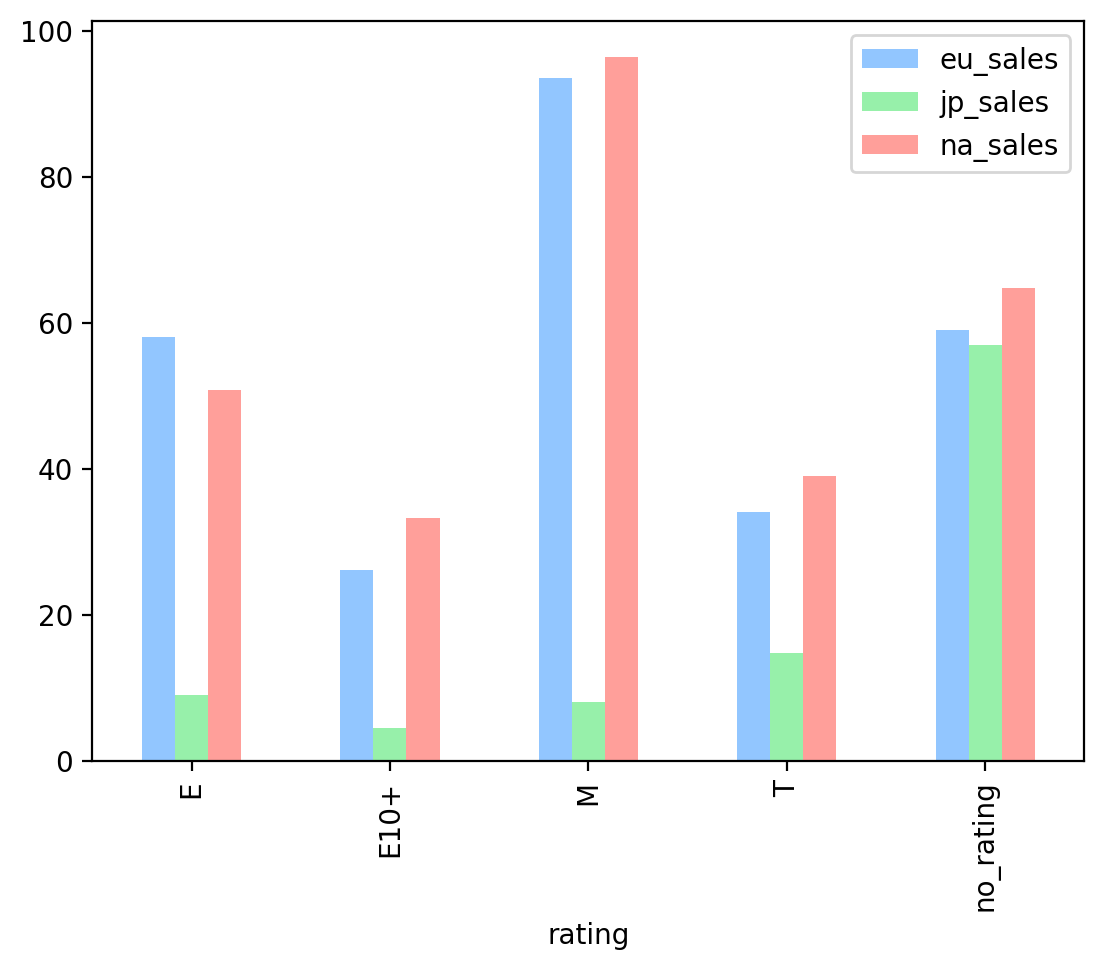

In [43]:
#проверим влияет ли рейтинг ESRB на продажи в отдельном регионе

inf_rating = data_actual_period.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
print(inf_rating)
inf_rating.plot(kind='bar')
plt.show()

Согласно терминологии ESRB рейтинги класссифицируются следующим образом:

«E» («Everyone») — «Для всех»

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«EC» («Early childhood») — «Для детей младшего возраста»

«M» («Mature») — «Для взрослых»

«RP» («Rating Pending») — «Рейтинг ожидается»

«T» («Teen») — «Подросткам»

no_rating - мы заполняли пропуски, те игры в которых рейтинг не был указан.

Игр без указания рейтинга в актуальном периоде значительное и примерно одинавовое количество во всех регионах, очевидно требуется время для присвоения рейтинга.

Рейтинговая оценка имеет большее влияние в Северной Америке, там популярны игры для взрослых, на втором месте игры без рейтигнга, на третьем в категории для всех, далее - подросткам и на последнем месте для всех от 10 лет и старше.

В Европе также рейтинговая оценка имеет значительное влияние. Наибольшую долю занимают игры в категории для взрослых, второе место делят - игры для всех и игры без рейтинга, третье место - подросткам и последнее - для всех от 10 лет и старше.

На рынке Японии больше всего игр без рейтинга, что не удивительно, так как основное направление ESRB это оценка игр на рынке США и Канады, возможно в Японии есть своя компания, занимающаяся присвоением рейтиинга. Далее идут игры в категории подросткам, для всех, для взрослых и для всех от 10 лет и старше.

## Проверка гипотез

Проверка гипотезы: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_0: средний рейтинг пользователей (user_score) платформы "XOne" = среднему рейтингу пользователей (user_score) платформы "PC"`

H_a: средний рейтинг пользователей (user_score) платформы "XOne" ≠ среднему рейтингу пользователей (user_score) платформы "PC"

alpha = 0.05

In [44]:
from scipy import stats as st

In [45]:
xone = data_actual_period[data_actual_period['platform'] =='XOne']['user_score']
pc = data_actual_period[data_actual_period['platform'] =='PC']['user_score']

results = st.ttest_ind(xone, pc, equal_var= False, nan_policy='omit') 

alpha = 0.05 

print('p-значение:', results.pvalue)
 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


Проверка гипотезы: cредние пользовательские рейтинги жанров Action и Sports разные

H_0: средний рейтинг пользователей (user_score) жанра "Action" = среднему рейтингу пользователей (user_score) жанра "Sports"`

H_a: средний рейтинг пользователей (user_score) жанра "Action" ≠ среднему рейтингу пользователей (user_score) жанра "Sports"

alpha = 0.05

In [46]:
action = data_actual_period[data_actual_period['genre'] =='Action']['user_score']
sports = data_actual_period[data_actual_period['genre'] =='Sports']['user_score']

results = st.ttest_ind(action, sports, equal_var= False, nan_policy='omit') 

alpha = 0.05 

print('p-значение:', results.pvalue)
 

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.182555038264477e-14
Отвергаем нулевую гипотезу


Мы использовали метод ttest_ind для проверки того, равны ли средние значения двух совокупностей. 

Так как выборки разного размера указали equal_var= False.

В первом случае нам не удалось отвергнуть нулевую гипотезу, потому как значение pvalue больше чем установленный критерий значимости, таким образом cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

При проверке во втором случае отвергаем нулевую гипотезу, о том что cредние пользовательские рейтинги жанров Action и Sports равны.

## Общий вывод

Мы проанализировали данные о продажах игр на разных платформах за период до 2016 года и пришли к следующим выводам.

- На этапе **предобработки данных** мы изменили тип данных в столбце с годом выпуска игры на целочисленный, а в столбце с оценками пользователей на число с плавающей точкой. 

Строки с пропусками в стобцах с именем, жанром и годом выпуска отбросили, так как их было немного.

Определили, что значение в столбце с оценками пользователей tbd (to be determined) - подлежит уточнению, фактически не известно, поэтому заменили его на пропуски. И так как количество пропусков в столбцах с оценкой критиков, пользователей и рейтинга большое, не стали их удалять, чтобы это не привело к искажению данных для исследования.

Пропуски в столбце с рейтингом изменили на значение "без рейтинга" для дальнейшего удобного анализа.

- На **первом этапе исследовательского анализа** мы заметили что, активный рост числа игр начинается с 1994 года, что скорей всего связано с выпуском и активным распротранением на мировом рынке первой игровой консоли PlayStation. Далее рынок рос и развивался вплоть до 2009 года, после которого начался спад, что предположительно связано с общим мировым кризисом 2008 года.

На следующем шаге мы посмотрели как меняются продажи по платформам и определили, что в среднем жизненный цикл платформы составляет около 10 лет, есть и исключения - PC (персональный компьютер). Характерным сроком за который появляются новые и исчезают старые платформы является период в 6-7 лет. 

Таким образом, за актуальный период мы взяли данные начиная с 2014 года. Индустрия игр и игровых платформ развивается довольно быстро и брать период для прогноза более 3 лет не имеет смысла.

Далее мы проанализировали продажи за актуальный период и выявили потенциально прибыльные платфофрмы: PS4 и XOne.

Исследование влияния оценок на продажи показало что, чем выше оценки критиков, тем продажи больше, но зависимость слабая, а влияния на продажи оценок пользователей не прослеживается.

Далее мы определили, что игры в жанрах стабильно приносящие высокий доход это Shooter, Sports, Platform, Fighting и Role-Playing. А вот у игр в жанрах Puzzle, Strategy и Adventure низкие продажи.

- На **следующем этапе по определению портрета пользователя каждого региона** мы пришли к выводу что, европейские пользователи и пользователи Северной Америки в целом схожи, там популярны платформы PS4, PS3, XOne, X360, Wii, WiiU, однако для Европы еще и значительную часть составляет PC (персональный компьютер). Наибольшие отличия мы можем видеть на рынке Японии - продаж на платформе PC вообще нет, XOne, X360 - весьма не популярны, PS4, PS3 - чуть больше, но тоже мало, а самыми распространенными являются: 3DS, PSP, DS, PSV.

Что касается жанров, то пользователи Северной Америки и Европы также схожи в предпочтениях, там лидируют Action, Shooter и Sports. А вот пользователи в Японии выбирают больше жанры Role-Playing, Action и Fighting.

Проанализировав влияние рейтинговой оценки, мы выяснили что, она имеет большее влияние в Северной Америке, там популярны игры для взрослых, на втором месте игры без рейтигнга, на третьем в категории для всех, далее - подросткам и на последнем месте для всех от 10 лет и старше.

В Европе также рейтинговая оценка имеет значительное влияние. Наибольшую долю занимают игры в категории для взрослых, второе место делят - игры для всех и игры без рейтинга, третье место - подросткам и последнее - для всех от 10 лет и старше.

На рынке Японии больше всего игр без рейтинга, что не удивительно, так как основное направление ESRB это оценка игр на рынке США и Канады, возможно в Японии есть своя компания, занимающаяся присвоением рейтиинга.

- На **заключительном этапе по проверке гипотез** мы использовали метод ttest_ind так как проверяли равны ли средние значения двух совокупностей. Порогом критерия значимости установили 0.05. 

В первом случае нам не удалось отвергнуть нулевую гипотезу, потому как значение pvalue больше чем установленный критерий значимости, таким образом cредние пользовательские рейтинги платформ Xbox One и PC одинаковые.

При проверке во втором случае, мы отвергли нулевую гипотезу о том, что cредние пользовательские рейтинги жанров Action и Sports равны, таким образом, cредние пользовательские рейтинги жанров Action и Sports разные.

**Исходя из вышеописанного, можем сделать окончательный вывод, что лучше всего продавать игры для таких платформ как PS4, XOne, PC, в жанрах Shooter, Sports, Role-Playing в категории для взрослых и для всех на американском и европейском рынках и на платформах 3DS, PS4, PSV, в жанрах Role-Playing, Fighting, Shooter на рынке Японии, для извлечения максимальной прибыли.**